In [2]:
import pandas as pd

# Cargar el dataset principal
df = pd.read_csv('../data/raw/diabetes_012_health_indicators.csv')

# Mostrar las primeras filas del dataframe, la información general y estadísticas descriptivas
print("Primeras 5 filas del dataset:")
print(df.head())
print("\nInformación general del dataset:")
df.info()
print("\Estadísticas descriptivas del dataset:")
print(df.describe())

<>:11: SyntaxWarning: invalid escape sequence '\E'
<>:11: SyntaxWarning: invalid escape sequence '\E'
/tmp/ipykernel_967114/2125307437.py:11: SyntaxWarning: invalid escape sequence '\E'
  print("\Estadísticas descriptivas del dataset:")


Primeras 5 filas del dataset:
   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  

Excelente análisis inicial. Observamos lo siguiente:

  * **Tipos de datos:** Todas las columnas tienen un tipo de dato `float64`. Esto sugiere que las variables categóricas ya han sido codificadas numéricamente (probablemente a través de one-hot encoding o una codificación similar en el proceso de limpieza previo).
  * **Escalas variables:** Efectivamente, algunas columnas como `BMI`, `MentHlth`, `PhysHlth`, `Age`, `Education`, e `Income` tienen rangos de valores diferentes a las columnas binarias (0 o 1). `GenHlth` tiene una escala de 1 a 5. Esto es importante a considerar para futuros modelos de aprendizaje automático, ya que algunos algoritmos son sensibles a la escala de las características.
  * **Valores faltantes:** La función `info()` nos indica que todas las columnas tienen 253680 valores no nulos, lo que significa que **no hay valores faltantes** en este dataset. ¡Una buena noticia para simplificar la limpieza\!

El siguiente paso lógico es **analizar la distribución de la variable objetivo (`Diabetes_012`) para entender el problema de clasificación multiclase y el posible desbalanceo**. Además, vamos a verificar la distribución de las otras variables para tener una mejor comprensión de los datos.

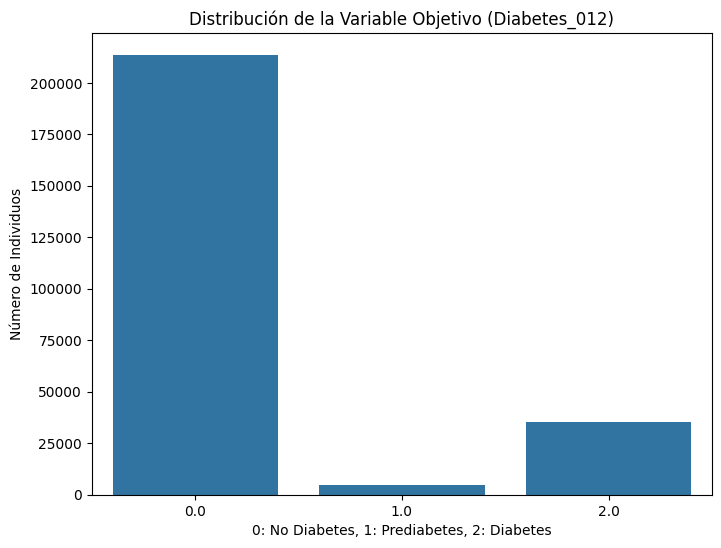


Proporción de cada clase en la variable objetivo:
Diabetes_012
0.0    0.842412
2.0    0.139333
1.0    0.018255
Name: proportion, dtype: float64


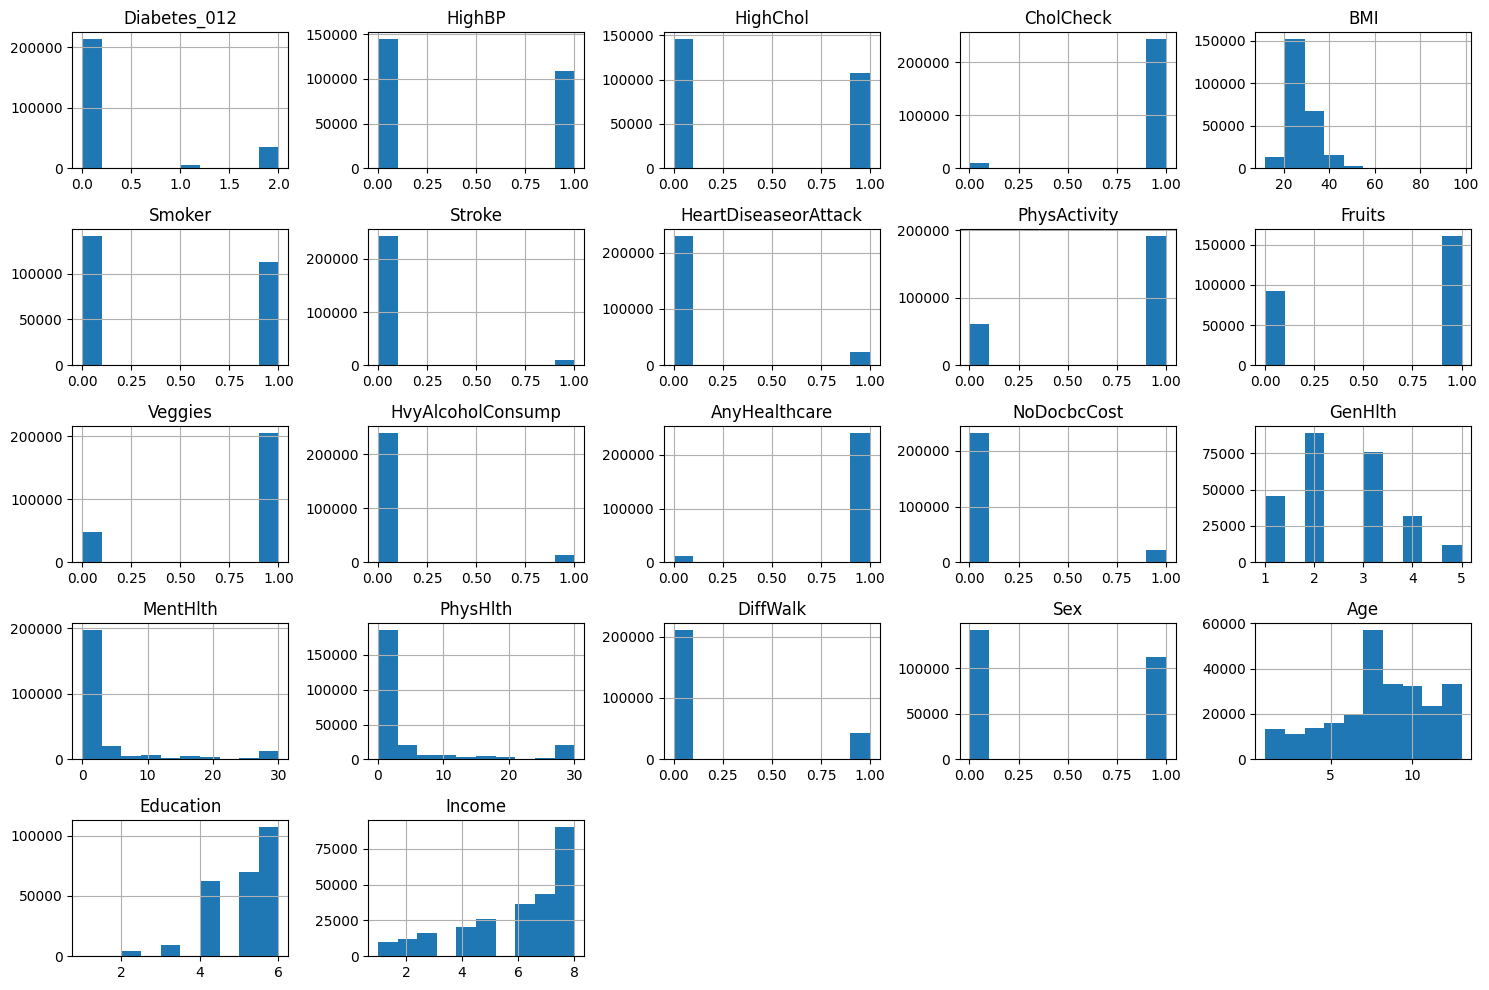

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Análisis de la variable objetivo
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Diabetes_012')
plt.title('Distribución de la Variable Objetivo (Diabetes_012)')
plt.xlabel('0: No Diabetes, 1: Prediabetes, 2: Diabetes')
plt.ylabel('Número de Individuos')
plt.show()

print("\nProporción de cada clase en la variable objetivo:")
print(df['Diabetes_012'].value_counts(normalize=True))

# Histogramas de las variables numéricas (para tener una idea de su distribución)
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

El desbalanceo en la variable objetivo `Diabetes_012` es bastante pronunciado:

  * **Clase 0 (No Diabetes):** Representa aproximadamente el 84.2% de los datos.
  * **Clase 2 (Diabetes):** Representa alrededor del 13.9% de los datos.
  * **Clase 1 (Prediabetes):** Es la clase minoritaria, con solo un 1.8% de las muestras.

Este desbalanceo significativo podría afectar el rendimiento de algunos modelos de clasificación, ya que podrían tender a favorecer la clase mayoritaria. Será importante abordar esto mediante técnicas de balanceo más adelante.

Los histogramas nos dan una idea de la distribución de cada variable. Observamos que muchas de las variables binarias (HighBP, HighChol, Smoker, Stroke, etc.) están fuertemente sesgadas hacia una de las dos clases. Variables como `BMI`, `MentHlth`, y `PhysHlth` muestran distribuciones con colas hacia la derecha. `Age`, `Education`, y `Income` también tienen distribuciones específicas que reflejan las categorías definidas.

Ahora, como bien señalaste, el siguiente paso crucial es **identificar y manejar los registros duplicados**. Dado que mencionaste que los duplicados se repiten más de una vez y que una parte importante se encuentra en la clase mayoritaria (No Diabetes), eliminarlos podría ayudar a reducir el desbalanceo.

Aquí tienes el código para identificar cuántas veces se repite cada fila en el DataFrame y luego eliminar los duplicados, manteniendo la primera ocurrencia:

### **Snippet: Punto de Entrada para Preprocesamiento de Datos**  

#### **📌 Importaciones y Rutas**  
Configura las librerías necesarias y define las rutas a tus datos brutos y al directorio donde se guardarán los datos procesados.  
- **`sys.path.append`** es crucial para que Python pueda encontrar los módulos en tu carpeta `src/`.  

```python
import sys
sys.path.append("src/")  # 👈 Asegura que Python detecte los módulos en src/
from data_loader import load_raw_data
from data_preprocessing import remove_duplicates_and_save
```

#### **📥 Carga de Datos Brutos**  
Utiliza **`load_raw_data`** (de `src/data_loader.py`) para cargar tu archivo CSV original.  
- **`df_raw`** puede contener duplicados.  

```python
df_raw = load_raw_data("data/raw/dataset.csv")  # 🗃️ Carga el dataset original
```

#### **♻️ Gestión de Duplicados**  
La línea clave es:  
```python
df_unique = remove_duplicates_and_save(df_raw, "data/processed/df_unique.parquet")  
```  
**¿Qué hace esta función?**  
1. **Verifica** si `df_unique.parquet` ya existe.  
   - Si **sí existe**, lo carga y evita reprocesamiento. ✅  
   - Si **no existe**, elimina duplicados de `df_raw`, guarda el resultado en `.parquet` y lo retorna. 🔄  
2. **Ventajas**:  
   - **Evita código repetitivo** en el notebook.  
   - **Optimiza tiempo** al no reprocesar datos innecesariamente.  

#### **🚀 Continuidad del Pipeline**  
Una vez ejecutado:  
- **`df_unique`** contendrá el DataFrame sin duplicados.  
- **Listo** para los siguientes pasos:  
  - Escalado de características.  
  - Remuestreo (oversampling/undersampling).  
  - Entrenamiento de modelos.  

---

**Nota**: Este enfoque modularizado sigue buenas prácticas de **MLOps**, separando la lógica de carga/preprocesamiento en archivos independientes (`src/`).  

In [3]:
# --- Notebook para la carga y preprocesamiento de datos ---
# Este notebook se encarga de cargar el dataset original, eliminar duplicados y guardar el dataset limpio.
import sys
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Añadir el directorio raíz del proyecto al sys.path para que funcione el import de src
# Esto es crucial si ejecutas el notebook desde el subdirectorio 'notebooks'
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# Importar las funciones de nuestros módulos
from src.data_loader import load_raw_data # Para cargar el DataFrame original
from src.data_preprocessor import remove_duplicates_and_save # Para la lógica de duplicados

# --- Configuración de rutas ---
# Ajusta la ruta de tu archivo CSV original si es diferente
RAW_DATA_PATH = '../data/raw/diabetes_012_health_indicators.csv'
PROCESSED_DATA_DIR = '../data/processed_data' # Donde se guardará df_unique.parquet

# Asegurar que el directorio de datos procesados exista
os.makedirs(PROCESSED_DATA_DIR, exist_ok=True)


# --- Cargar el DataFrame original (df) ---
# Esta parte asume que tu CSV está en ../data/raw/
# df_raw contendrá el DataFrame tal cual se lee del CSV (posiblemente con duplicados).
df_raw = load_raw_data(RAW_DATA_PATH)

# --- Eliminar duplicados y obtener df_unique ---
# Se llama a la función modularizada. Esta función se encarga internamente de:
# 1. Verificar si 'df_unique.parquet' ya existe y es válido en PROCESSED_DATA_DIR.
# 2. Si existe, lo carga directamente.
# 3. Si no existe, realiza la eliminación de duplicados a partir de 'df_raw',
#    imprime las estadísticas de duplicados, muestra un plot de la distribución
#    de la variable objetivo y guarda el 'df_unique.parquet' resultante.
# La función devuelve siempre el DataFrame sin duplicados, ya sea cargado o recién creado.
df_unique = remove_duplicates_and_save(df_raw, PROCESSED_DATA_DIR, target_column='Diabetes_012')


# Ahora puedes continuar con tu análisis o pasar df_unique a la siguiente etapa.
# df_unique es el DataFrame limpio y sin duplicados que usarás de aquí en adelante.
print("\nDataFrame único (df_unique) listo para el siguiente paso de preprocesamiento.")
print(df_unique.head())

# Nota: Si el resto de tu notebook usa una variable llamada `df`,
# puedes reasignar `df = df_unique` aquí para mantener la compatibilidad.
# Sin embargo, es buena práctica usar el nombre `df_unique` para mayor claridad.
# df = df_unique

Cargando datos brutos desde: ../data/raw/diabetes_012_health_indicators.csv
Datos brutos cargados exitosamente.
Cargando df_unique desde ../data/processed_data/df_unique.parquet...
df_unique cargado exitosamente.

DataFrame único (df_unique) listo para el siguiente paso de preprocesamiento.
   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3          

La eliminación de duplicados redujo significativamente el tamaño del dataset y, lo que es muy importante, disminuyó ligeramente el desbalanceo al eliminar proporcionalmente más registros de la clase mayoritaria (No Diabetes). Las nuevas proporciones son:

  * **Clase 0 (No Diabetes):** \~82.7%
  * **Clase 2 (Diabetes):** \~15.3%
  * **Clase 1 (Prediabetes):** \~2.0%

Aunque la clase de prediabetes sigue siendo minoritaria, la reducción en la clase mayoritaria es un paso positivo.

El siguiente paso crucial es **separar la variable objetivo (`Diabetes_012`) de las características predictoras**. Esto nos permitirá preparar los datos para el modelado. Además, dado que algunas de las características tienen escalas diferentes, consideraremos la **estandarización o normalización** de las características numéricas para que tengan una escala similar. Esto es importante para muchos algoritmos de aprendizaje automático.

Aquí tienes el código para realizar esta separación y preparar un escalador estándar:

In [ ]:
# notebooks/02_preprocessing_and_model_tuning.ipynb (Nombre sugerido para claridad)

import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))  # Añade el directorio padre al path

# --- FORZAR RECARGA DE MÓDULOS ---
# Esto es crucial si has modificado los archivos .py y Jupyter/Python está usando una versión en caché.
import importlib
import src.data_loader
import src.data_preprocessor
import src.resamplers
import src.model_evaluator

importlib.reload(src.data_loader)
importlib.reload(src.data_preprocessor)
importlib.reload(src.resamplers)
importlib.reload(src.model_evaluator)
# --- FIN DE RECARGA FORZADA ---


import pandas as pd
import joblib # Para cargar/guardar results_metrics.joblib
import numpy as np # Necesario para np.unique en class_weight

# Importar las funciones de nuestros módulos (ahora recargados)
from src.data_loader import load_raw_data
from src.data_preprocessor import preprocess_and_resample_data, check_and_load_processed_data, remove_duplicates_and_save
from src.resamplers import apply_hybrid_resampling
from src.model_evaluator import save_model_and_report

# Importaciones adicionales para los modelos y métricas
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import make_scorer, f1_score, recall_score, classification_report, confusion_matrix, precision_score
from sklearn.model_selection import RandomizedSearchCV
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import class_weight # Importar para calcular pesos de clase

# --- Resto del código del notebook sigue igual ---
# ... (el resto de tu notebook, incluyendo la sección de carga de datos que ya corregimos) ...

# --- Configuración de rutas ---
# Se asume que este notebook está en 'notebooks/'
# y los datos procesados en '../data/processed_data'
# y los informes en '../docs/model_performance_reports'
# y los modelos entrenados en '../trained_models'
# Ajusta según tu estructura real

UNIQUE_DATA_PATH = '../data/processed_data/df_unique.parquet'
PROCESSED_DATA_DIR = '../data/processed_data'
MODELS_DIR = '../trained_models'
REPORTS_DIR = '../docs/model_performance_reports'
MODEL_EVAL_RESULTS_DIR = os.path.join('../docs', 'model_evaluation_summaries')
RESULTS_METRICS_FILE = os.path.join(MODEL_EVAL_RESULTS_DIR, 'results_metrics.joblib')


# Asegurarse de que los directorios necesarios existan
os.makedirs(PROCESSED_DATA_DIR, exist_ok=True)
os.makedirs(MODELS_DIR, exist_ok=True)
os.makedirs(REPORTS_DIR, exist_ok=True)
os.makedirs(MODEL_EVAL_RESULTS_DIR, exist_ok=True)


# --- Cargar o Preprocesar Datos ---
# Primero, intenta cargar los datos ya procesados (X_train_scaled, etc.)
loaded_data_tuple = check_and_load_processed_data(PROCESSED_DATA_DIR)
data_loaded = loaded_data_tuple[0]
data = loaded_data_tuple[1]

# Inicializar todas las variables para asegurar que siempre estén definidas
# Importante: Inicializar con None o una estructura vacía si no se cargan
X_train_scaled, X_test_scaled, y_train, y_test, scaler = [None] * 5
X_train_smote_prev, y_train_smote_prev = [None] * 2
X_train_rus_prev, y_train_rus_prev = [None] * 2
X_train_smoteenn, y_train_smoteenn = [None] * 2
X_train_smotetomek, y_train_smotetomek = [None] * 2


if data_loaded:
    # CORRECCIÓN CLAVE AQUÍ: Desempaquetar los 13 elementos de la tupla
    X_train_scaled, X_test_scaled, y_train, y_test, scaler, \
    X_train_smote_prev, y_train_smote_prev, X_train_rus_prev, y_train_rus_prev, \
    X_train_smoteenn, y_train_smoteenn, X_train_smotetomek, y_train_smotetomek = data
    print("Datos preprocesados y remuestreados (incluyendo híbridos) cargados exitosamente desde archivos.")
else:
    # Si los datos no se cargaron, procesarlos desde el inicio.
    print("Iniciando preprocesamiento completo (división, escalado, remuestreo inicial y híbrido)...")
    
    df_unique_path_to_load = os.path.join(PROCESSED_DATA_DIR, 'df_unique.parquet')
    if not os.path.exists(df_unique_path_to_load):
        # Si df_unique no existe, cargar datos brutos y eliminar duplicados
        print(f"df_unique.parquet no encontrado en {df_unique_path_to_load}. Cargando datos brutos y eliminando duplicados...")
        df_raw = load_raw_data()
        df_unique = remove_duplicates_and_save(df_raw, PROCESSED_DATA_DIR)
    else:
        # Si df_unique existe, cargarlo para el preprocesamiento subsiguiente
        df_unique = pd.read_parquet(df_unique_path_to_load)
        print(f"df_unique cargado desde {df_unique_path_to_load} para el preprocesamiento subsiguiente.")

    # Aquí se pasa df_unique (sin duplicados) a la función de preprocesamiento y remuestreo
    # Esta función ya devuelve los 13 elementos, incluyendo los híbridos
    X_train_scaled, X_test_scaled, y_train, y_test, scaler, \
    X_train_smote_prev, y_train_smote_prev, X_train_rus_prev, y_train_rus_prev, \
    X_train_smoteenn, y_train_smoteenn, X_train_smotetomek, y_train_smotetomek = \
        preprocess_and_resample_data(df_unique, PROCESSED_DATA_DIR)


# --- Conjuntos de entrenamiento a utilizar para la optimización ---
# Ahora los conjuntos híbridos ya deberían estar cargados si data_loaded es True,
# o generados y guardados si data_loaded es False.
train_sets_for_tuning = {
    'Original': (X_train_scaled, y_train),
    'SMOTE': (X_train_smote_prev, y_train_smote_prev),
    'RUS': (X_train_rus_prev, y_train_rus_prev),
    'SMOTE-ENN': (X_train_smoteenn, y_train_smoteenn),
    'SMOTE-Tomek': (X_train_smotetomek, y_train_smotetomek),
}

# --- Bucle de Optimización ---
print("\n--- Iniciando optimización de hiperparámetros (Randomized Search) ---")

# Calculo de pesos de clase para usar con modelos que lo soportan
# Esto se hace una vez, después de que y_train esté disponible
if y_train is not None:
    class_weights_calculated = class_weight.compute_class_weight(
        'balanced', classes=np.unique(y_train), y=y_train
    )
    custom_class_weights = {i: class_weights_calculated[i] for i in range(len(class_weights_calculated))}
    print(f"Pesos de clase calculados (balanced): {custom_class_weights}")
else:
    custom_class_weights = 'balanced' # Usar el string 'balanced' si y_train no está disponible
    print("y_train no disponible para calcular pesos de clase personalizados. Usando 'balanced' por defecto.")


# Modelos seleccionados para optimización de hiperparámetros
models_for_tuning = {
    'Logistic Regression': LogisticRegression(random_state=42, solver='liblinear', multi_class='ovr', class_weight=custom_class_weights, max_iter=5000),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight=custom_class_weights),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss', objective='multi:softmax', num_class=3)
}

# Rejillas de parámetros (se mantienen)
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2']
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_features': ['sqrt', 'log2'],
        'max_depth': [10, 20, 30, None],
        'min_samples_leaf': [1, 2, 4]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'XGBoost': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.7, 0.8, 0.9]
    }
}

# Scorer principal para optimización (F1-weighted para evaluación general)
scorer_f1_weighted = make_scorer(f1_score, average='weighted')

# Nuevo scorer para priorizar la precisión de la clase 'Prediabetes' (clase 1.0)
scorer_precision_prediabetes = make_scorer(precision_score, average=None, labels=[1], zero_division=0)
# Si quieres usar recall: scorer_recall_prediabetes = make_scorer(recall_score, average=None, labels=[1], zero_division=0)

# Cargar resultados previos si existen
results = {}
if os.path.exists(RESULTS_METRICS_FILE):
    try:
        results = joblib.load(RESULTS_METRICS_FILE)
        print(f"Resultados previos cargados desde {RESULTS_METRICS_FILE}")
    except Exception as e:
        print(f"Error al cargar resultados previos: {e}. Se inicializarán los resultados.")
        results = {}

# Añadir los nombres de los conjuntos de datos que se usarán para el tuning
set_names_to_tune = ['Original', 'SMOTE', 'RUS', 'SMOTE-ENN', 'SMOTE-Tomek']

for name, model_instance in models_for_tuning.items():
    print(f"\nProcesando modelo: {name}")
    for set_name in set_names_to_tune:
        result_key = f"{name}_tuned_with_{set_name}"

        # Comprobar si ya se ha optimizado y guardado
        if result_key in results and 'best_params' in results[result_key]:
            print(f"Saltando optimización de {name} con datos {set_name} (ya optimizado y guardado).")
            # Recalcular métricas para asegurar que estén actualizadas si se cargó el modelo
            optimized_model_filename = os.path.join(MODELS_DIR, f"{name.replace(' ', '_')}_{set_name.replace(' ', '_')}_tuned.joblib")
            if os.path.exists(optimized_model_filename):
                try:
                    optimized_model = joblib.load(optimized_model_filename)
                    y_pred = optimized_model.predict(X_test_scaled)
                    results[result_key]['classification_report'] = classification_report(y_test, y_pred, target_names=['No Diabetes', 'Prediabetes', 'Diabetes'])
                    results[result_key]['confusion_matrix'] = confusion_matrix(y_test, y_pred)
                    print(f"Métricas actualizadas para {result_key}.")
                except Exception as e:
                    print(f"Error al cargar modelo optimizado para {result_key}: {e}")
            continue

        print(f"Iniciando optimización para {name} con datos {set_name}...")

        # Obtener el conjunto de entrenamiento correspondiente
        X_train_set, y_train_set = train_sets_for_tuning[set_name]
        
        # Verificar si los datos son nulos después de la asignación
        if X_train_set is None or y_train_set is None:
            print(f"Saltando {name} con datos {set_name}: Datos no disponibles o nulos.")
            continue

        # --- REDUCCIÓN DE CONSUMO: Ajustar n_jobs y n_iter para pruebas iniciales ---
        N_JOBS_COUNT = 2 # <-- AJUSTA ESTE VALOR. Prueba con 1, 2, 4.
        N_ITER_COUNT = 5 # <-- AJUSTA ESTE VALOR.

        search_cv = RandomizedSearchCV(
            estimator=model_instance,
            param_distributions=param_grids[name],
            n_iter=N_ITER_COUNT,
            scoring=scorer_precision_prediabetes, # <--- CAMBIO CLAVE AQUÍ: Usamos el scorer para prediabetes
            cv=3,
            verbose=1,
            n_jobs=N_JOBS_COUNT,
            random_state=42
        )
        
        start_time_tune = time.time()
        search_cv.fit(X_train_set, y_train_set)
        end_time_tune = time.time()
        tuning_time = end_time_tune - start_time_tune

        best_model = search_cv.best_estimator_
        best_params = search_cv.best_params_
        best_score = search_cv.best_score_ # Este será el score de precisión para la clase 1.0

        print(f"Mejores parámetros encontrados: {best_params}")
        print(f"Mejor Precision Score (CV) para Prediabetes: {best_score:.4f}") # Cambiado el mensaje

        # Evaluar en el conjunto de prueba (X_test_scaled y y_test no cambian)
        y_pred = best_model.predict(X_test_scaled)
        report = classification_report(y_test, y_pred, target_names=['No Diabetes', 'Prediabetes', 'Diabetes'])
        cm = confusion_matrix(y_test, y_pred)
        
        results[result_key] = {
            'best_model': best_model,
            'best_params': best_params,
            'best_cv_score': best_score, # Ahora es la precisión de prediabetes
            'tuning_time': tuning_time,
            'classification_report': report,
            'confusion_matrix': cm
        }

        # ¡Llamar a la función modularizada para guardar!
        save_model_and_report(
            best_model, name, set_name, best_params, best_score, tuning_time,
            report, cm, MODELS_DIR, REPORTS_DIR, show_plot=False
        )

    # Guardar los resultados globales después de cada modelo (para persistencia incremental)
    joblib.dump(results, RESULTS_METRICS_FILE)
    print(f"Resultados actuales guardados en {RESULTS_METRICS_FILE}")

print("\n--- Optimización de hiperparámetros completada ---")

# --- Mostrar todos los resultados de los modelos optimizados ---
print("\n--- RESUMEN DE RESULTADOS DE LOS MODELOS OPTIMIZADOS ---")
for result_key, metrics_data in results.items():
    if "tuned" in result_key:
        model_name_display = result_key.split('_tuned_with_')[0].replace('_', ' ')
        set_name_display = result_key.split('_tuned_with_')[-1]
        
        print(f"\nResultados para {model_name_display} (Optimizado con {set_name_display}):")
        print(f"  Mejores Parámetros: {metrics_data.get('best_params', 'N/A')}")
        print(f"  Mejor Score CV (Precisión Prediabetes): {metrics_data.get('best_cv_score', 'N/A'):.4f}") # Mensaje actualizado
        print(f"  Tiempo de Optimización: {metrics_data.get('tuning_time', 'N/A'):.2f} segundos")
        print("  Classification Report:")
        print(metrics_data['classification_report'])
        
        # Mostrar la matriz de confusión aquí
        plt.figure(figsize=(8, 6))
        sns.heatmap(metrics_data['confusion_matrix'], annot=True, fmt='d', cmap='Blues',
                    xticklabels=['No Diabetes', 'Prediabetes', 'Diabetes'],
                    yticklabels=['No Diabetes', 'Prediabetes', 'Diabetes'])
        plt.title(f'Matriz de Confusión - {model_name_display} (Optimizado con {set_name_display})')
        plt.xlabel('Predicción')
        plt.ylabel('Real')
        plt.show()


Cargando datos preprocesados y escalador desde archivos...
Datos cargados exitosamente.
Datos preprocesados y remuestreados (incluyendo híbridos) cargados exitosamente desde archivos.

--- Iniciando optimización de hiperparámetros (Randomized Search) ---
Pesos de clase calculados (balanced): {0: np.float64(0.40300879794970285), 1: np.float64(16.547303987757672), 2: np.float64(2.1823016834057505)}
Resultados previos cargados desde ../docs/model_evaluation_summaries/results_metrics.joblib

Procesando modelo: Logistic Regression
Saltando optimización de Logistic Regression con datos Original (ya optimizado y guardado).
Métricas actualizadas para Logistic Regression_tuned_with_Original.
Saltando optimización de Logistic Regression con datos SMOTE (ya optimizado y guardado).
Métricas actualizadas para Logistic Regression_tuned_with_SMOTE.
Saltando optimización de Logistic Regression con datos RUS (ya optimizado y guardado).
Métricas actualizadas para Logistic Regression_tuned_with_RUS.
Salt

/home/juandomingo/factoriaf5/mod02-projs/multiclase-classifier_e2-07/.venv-proj07/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Mejores parámetros encontrados: {'n_estimators': 300, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': None}
Mejor Precision Score (CV) para Prediabetes: 0.8468
Modelo optimizado guardado: ../trained_models/Random_Forest_SMOTE-ENN_tuned.joblib
Informe guardado: ../docs/model_performance_reports/Random_Forest_SMOTE-ENN_tuned_report.md
Iniciando optimización para Random Forest con datos SMOTE-Tomek...
Fitting 3 folds for each of 5 candidates, totalling 15 fits


# Estrategia para Mejorar la Detección de la Clase Prediabetes en Modelos Desbalanceados

> **Contexto:**  
Parece que te enfrentas a un problema común en el aprendizaje automático con datasets desbalanceados: la dificultad para predecir correctamente la clase minoritaria (en este caso, la prediabetes). La baja precisión (`0.06`) para la clase `1.0` es una clara señal de que el modelo no está identificando bien esos casos. Los tiempos de entrenamiento prolongados también son un desafío, especialmente con técnicas de remuestreo como SMOTE.

No es necesario empezar de cero, pero sí cambiar la estrategia y profundizar en algunas áreas. El plan de ir sumando estrategias de balanceo y *feature engineering* es bueno, pero necesitamos ser más específicos y enfocarnos en la clase problemática.

---

## 🧠 Análisis del Problema y Causas Posibles

- **Desbalance Extremo:**  
  La clase de prediabetes es una minoría muy pequeña. Aunque estés usando SMOTE y RUS, es posible que no sean suficientes o generen ruido.

- **Métricas de Evaluación Inadecuadas:**  
  Si el objetivo es mejorar la precisión de la prediabetes, necesitamos optimizar con una métrica enfocada en esa clase (no `f1_weighted` general).

- **Modelo vs Datos:**  
  Modelos complejos pueden sobreajustar a la mayoría y "olvidar" la minoritaria.

- **Tiempo de Entrenamiento:**  
  La regeneración constante de datasets remuestreados ralentiza el flujo de trabajo.

---

## 📌 Nueva Estrategia Propuesta

### 1. Refinar el Remuestreo y Persistencia

- **Guardar conjuntos SMOTE-ENN y SMOTE-Tomek:**  
  Evita regenerarlos cada vez. Úsalos desde archivos `.parquet`.

- **`class_weight` Personalizado:**  
  Asigna mayor peso a la clase prediabetes.

- **Enfoque One-vs-Rest (OvR):**  
  Usa explícitamente `OneVsRestClassifier` si necesitas más control.

---

### 2. Optimización de Hiperparámetros Focalizada

- **Métrica de Optimización Específica:**
  ```python
  scorer_precision_prediabetes = make_scorer(
      precision_score, average=None, labels=[1], zero_division=0
  )


* **Ajustes de búsqueda:**

  * Incrementa `n_iter` (combinaciones) y `cv` (pliegues) si el tiempo lo permite.

---

### 3. Feature Engineering y Selección

* **Análisis de Importancia de Variables**
* **Crear Nuevas Variables** (e.g. interacciones edad x BMI)

---

### 4. Explorar Nuevos Modelos

* `LightGBM`, `CatBoost`: Alternativas potentes, rápidas y buenas para desequilibrio.

---

## ⚙️ Implementación Técnica

### 🛠 Modificación de `src/data_preprocessor.py`

#### Cambios clave:

* **`preprocess_and_resample_data`:**

  * Llama a `apply_hybrid_resampling`
  * Guarda los datasets híbridos como `.parquet`
  * Devuelve nuevas variables.

* **`check_and_load_processed_data`:**

  * Verifica y carga también los híbridos.

---

### 📓 Actualización del Notebook `02_preprocessing_and_model_tuning.ipynb`

#### Cambios clave:

* Carga directa de `X_train_smoteenn`, `y_train_smoteenn`, etc.
* Carga `df_unique.parquet` si existe, o lo genera desde `df_raw`.
* Uso de `scorer_precision_prediabetes` en `RandomizedSearchCV`.

#### Ejemplo:

```python
# Definir un class_weight personalizado
custom_class_weights = {0: 1, 1: 10, 2: 3}

models_for_tuning = {
    'Logistic Regression': LogisticRegression(
        random_state=42, solver='liblinear', multi_class='ovr',
        class_weight=custom_class_weights, max_iter=5000
    ),
    'Random Forest': RandomForestClassifier(
        random_state=42, class_weight=custom_class_weights
    ),
}
```

---

## ✅ Próximos Pasos

1. Ejecuta `data_preprocessor.py` una vez para generar y guardar los datasets híbridos.
2. Corre el notebook. La carga será más rápida y la optimización priorizará la clase prediabetes.
3. Evalúa el rendimiento.
4. Ajusta `n_iter` y `cv` si ves mejoras.
5. Experimenta con `class_weight` personalizado según las proporciones reales.

---

> Con estos cambios, deberías ver una mejora en la detección de la clase prediabetes, incluso si esto sacrifica ligeramente otras métricas. ¡Mucho éxito! 🚀

```

# 🧪 Análisis de Resultados y Estrategia de Mejora

Aquí tienes el análisis de tus resultados y la estrategia a seguir, **abordando el problema de los datos nulos para SMOTE-ENN y SMOTE-Tomek**, y reiterando los próximos pasos para mejorar la precisión de la clase **Prediabetes**.

---

## 📊 Análisis de Resultados Actuales

Es excelente que hayas persistido y que el proceso de carga de datos y persistencia esté funcionando mejor. Sin embargo, los resultados siguen mostrando el mismo patrón problemático para la clase **"Prediabetes"**:

### ⚠️ Problemas Detectados

* **"Datos no disponibles o nulos" para SMOTE-ENN y SMOTE-Tomek**
  El mensaje `Saltando X con datos SMOTE-ENN: Datos no disponibles o nulos.` indica que, a pesar de las modificaciones en `data_preprocessor.py`, las variables:

  * `X_train_smoteenn`, `y_train_smoteenn`
  * `X_train_smotetomek`, `y_train_smotetomek`

  **no se están asignando correctamente** al cargar los datos desde archivos. Los modelos **no están siendo optimizados** con estos conjuntos híbridos.

* **Precisión muy baja para la clase Prediabetes (Clase 1.0)**:

  * **Logistic Regression**:

    * SMOTE: 🎯 Precisión: `0.03`, 📈 Recall: `0.27`
    * RUS: 🎯 Precisión: `0.03`, 📈 Recall: `0.25`
  * **Random Forest**:

    * SMOTE: 🎯 Precisión: `0.06`, 📈 Recall bajo
    * RUS: 🎯 Precisión: `0.03`
    * Original: 🎯 Precisión: `0.04`
  * **Gradient Boosting / XGBoost**:

    * Precisión y Recall: `0.00` en "Original" y "SMOTE"
    * RUS: 🎯 Precisión: `0.03`

* ⏱️ **Tiempos de entrenamiento** largos:

  * Random Forest (SMOTE): `5889s`
  * Gradient Boosting (SMOTE): `9361s`

Estos resultados indican que **el problema de carga de datos híbridos es crítico**, ya que esas técnicas pueden mejorar la detección de la clase minoritaria.

---

## 🛠️ Causa del Problema: "Datos no disponibles o nulos"

🔍 El problema está en el **desempaquetado de variables** en el notebook cuando `data_loaded = True`.

```python
# check_and_load_processed_data retorna 13 elementos:
(X_train_scaled, X_test_scaled, y_train, y_test, scaler,
 X_train_smote, y_train_smote,
 X_train_rus, y_train_rus,
 X_train_smoteenn, y_train_smoteenn,
 X_train_smotetomek, y_train_smotetomek)
```

❌ Pero en el notebook solo se desempaquetaban 9:

```python
# Incorrecto:
X_train_scaled, X_test_scaled, y_train, y_test, scaler, \
X_train_smote_prev, y_train_smote_prev, X_train_rus_prev, y_train_rus_prev = data
```

➡️ Esto deja los datasets híbridos como `None`, y causa que el modelo los **salte** al entrenar.

---

## ✅ Estrategia Revisada

### 🔧 Punto 1: Corrección en el Notebook

* Archivo: `notebooks/02_preprocessing_and_model_tuning.ipynb`
* ✅ **Corregido el desempaquetado** para aceptar los 13 elementos.
* 🧼 Variables inicializadas con `None` como medida de seguridad.

### 🔁 Punto 2: Re-ejecutar el Notebook

1. Asegúrate de que `src/data_preprocessor.py` esté **actualizado**.
2. Ejecuta de nuevo `02_preprocessing_and_model_tuning.ipynb`.
3. Verifica que **SMOTE-ENN y SMOTE-Tomek** ya no se omiten.
4. ✅ Tiempos de entrenamiento deberían ser similares a SMOTE o RUS.

---

## 🚀 Próximas Estrategias si la Precisión Sigue Baja

### 🎯 1. Ajuste Manual de `class_weight`

* **Objetivo**: Aumentar la atención a la clase "Prediabetes" durante el entrenamiento.

#### 🧮 Cómo calcular:

```python
from sklearn.utils import class_weight

class_weights_calculated = class_weight.compute_class_weight(
    'balanced', classes=np.unique(y_train), y=y_train
)

custom_class_weights = {i: class_weights_calculated[i] for i in range(len(class_weights_calculated))}
print(f"Pesos de clase calculados: {custom_class_weights}")
```

#### 🧰 Aplicación en modelos:

```python
models_for_tuning = {
    'Logistic Regression': LogisticRegression(
        random_state=42, solver='liblinear', multi_class='ovr',
        class_weight=custom_class_weights, max_iter=5000
    ),
    'Random Forest': RandomForestClassifier(
        random_state=42, class_weight=custom_class_weights
    ),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(
        random_state=42, use_label_encoder=False, eval_metric='mlogloss',
        objective='multi:softmax', num_class=3
    )
}
```

📌 **Cuándo aplicar**: Después de probar los conjuntos híbridos.

---

### 🤖 2. Explorar Modelos Especializados: LightGBM y CatBoost

* **Objetivo**: Modelos eficientes con mejor manejo de desbalance.

#### ⚙️ Cómo aplicar:

```bash
pip install lightgbm catboost
```

```python
import lightgbm as lgb
from catboost import CatBoostClassifier

models_for_tuning['LightGBM'] = lgb.LGBMClassifier(
    random_state=42, class_weight=custom_class_weights,
    objective='multiclass', num_class=3
)

models_for_tuning['CatBoost'] = CatBoostClassifier(
    random_state=42, verbose=0, class_weights=custom_class_weights,
    loss_function='MultiClass'
)

param_grids['LightGBM'] = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [20, 31, 40],
}

param_grids['CatBoost'] = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [4, 6, 8],
}
```

📌 **Cuándo aplicar**: Si `class_weight` no es suficiente.

---

### 🧬 3. Feature Engineering Avanzado

* **Objetivo**: Crear variables que revelen mejor los patrones de prediabetes.

#### 🧱 Ideas:

* **Interacciones polinómicas**:
  Ej: `edad * IMC` con `PolynomialFeatures`.

* **Discretización**:
  Convertir variables continuas a categorías (ej. glucosa).

* **Reglas lógicas**:
  Si `glucosa > 110` y `IMC > 30`, crear variable binaria.

📌 **Cuándo aplicar**: Como fase final, si todo lo anterior falla.

---

## 🔄 Iteración y Documentación

1. ✅ Aplica la corrección del notebook y re-ejecuta.
2. 📈 Analiza los nuevos resultados (precisión clase "Prediabetes").
3. ⚙️ Aplica `class_weight` personalizado.
4. 🧪 Si no alcanza `0.30`, introduce LightGBM y CatBoost.
5. 🔍 Finalmente, explora Feature Engineering si sigue el problema.

---

⚠️ **Recuerda**: En conjuntos desbalanceados, mejorar la clase minoritaria puede afectar ligeramente las demás. La clave es encontrar el **equilibrio óptimo para tu aplicación real**. 💡

In [ ]:
# notebooks/02_preprocessing_and_model_tuning.ipynb (Nombre sugerido para claridad)

import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))  # Añade el directorio padre al path

# --- FORZAR RECARGA DE MÓDULOS ---
# Esto es crucial si has modificado los archivos .py y Jupyter/Python está usando una versión en caché.
import importlib
import src.data_loader
import src.data_preprocessor
import src.resamplers
import src.model_evaluator

importlib.reload(src.data_loader)
importlib.reload(src.data_preprocessor)
importlib.reload(src.resamplers)
importlib.reload(src.model_evaluator)
# --- FIN DE RECARGA FORZADA ---


import pandas as pd
import joblib # Para cargar/guardar results_metrics.joblib
import numpy as np # Necesario para np.unique en class_weight

# Importar las funciones de nuestros módulos (ahora recargados)
from src.data_loader import load_raw_data, is_valid_parquet # Importar is_valid_parquet también
from src.data_preprocessor import preprocess_and_resample_data, check_and_load_processed_data, remove_duplicates_and_save
from src.resamplers import apply_hybrid_resampling
from src.model_evaluator import save_model_and_report

# Importaciones adicionales para los modelos y métricas
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import make_scorer, f1_score, recall_score, classification_report, confusion_matrix, precision_score
from sklearn.model_selection import RandomizedSearchCV
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import class_weight # Importar para calcular pesos de clase

# --- Configuración de rutas ---
# Se asume que este notebook está en 'notebooks/'
# y los datos procesados en '../data/processed_data'
# y los informes en '../docs/model_performance_reports'
# y los modelos entrenados en '../trained_models'
# Ajusta según tu estructura real

UNIQUE_DATA_PATH = '../data/processed_data/df_unique.parquet'
PROCESSED_DATA_DIR = '../data/processed_data'
MODELS_DIR = '../trained_models'
REPORTS_DIR = '../docs/model_performance_reports'
MODEL_EVAL_RESULTS_DIR = os.path.join('../docs', 'model_evaluation_summaries')
RESULTS_METRICS_FILE = os.path.join(MODEL_EVAL_RESULTS_DIR, 'results_metrics.joblib')


# Asegurarse de que los directorios necesarios existan
os.makedirs(PROCESSED_DATA_DIR, exist_ok=True)
os.makedirs(MODELS_DIR, exist_ok=True)
os.makedirs(REPORTS_DIR, exist_ok=True)
os.makedirs(MODEL_EVAL_RESULTS_DIR, exist_ok=True)


# --- Cargar o Preprocesar Datos (Lógica Robustecida) ---
# Definir todas las rutas de los archivos procesados que esperamos
X_train_scaled_path = os.path.join(PROCESSED_DATA_DIR, 'X_train_scaled.parquet')
X_test_scaled_path = os.path.join(PROCESSED_DATA_DIR, 'X_test_scaled.parquet')
y_train_path = os.path.join(PROCESSED_DATA_DIR, 'y_train.parquet')
y_test_path = os.path.join(PROCESSED_DATA_DIR, 'y_test.parquet')
X_train_smote_path = os.path.join(PROCESSED_DATA_DIR, 'X_train_smote.parquet')
y_train_smote_path = os.path.join(PROCESSED_DATA_DIR, 'y_train_smote.parquet')
X_train_rus_path = os.path.join(PROCESSED_DATA_DIR, 'X_train_rus.parquet')
y_train_rus_path = os.path.join(PROCESSED_DATA_DIR, 'y_train_rus.parquet')
X_train_smoteenn_path = os.path.join(PROCESSED_DATA_DIR, 'X_train_smoteenn.parquet')
y_train_smoteenn_path = os.path.join(PROCESSED_DATA_DIR, 'y_train_smoteenn.parquet')
X_train_smotetomek_path = os.path.join(PROCESSED_DATA_DIR, 'X_train_smotetomek.parquet')
y_train_smotetomek_path = os.path.join(PROCESSED_DATA_DIR, 'y_train_smotetomek.parquet')
scaler_path = os.path.join(PROCESSED_DATA_DIR, 'scaler.joblib')

# Lista de todos los archivos de datos procesados que deben existir
expected_processed_files = [
    X_train_scaled_path, X_test_scaled_path, y_train_path, y_test_path,
    X_train_smote_path, y_train_smote_path, X_train_rus_path, y_train_rus_path,
    X_train_smoteenn_path, y_train_smoteenn_path, X_train_smotetomek_path, y_train_smotetomek_path
]

# Verificar si todos los archivos esperados existen y son válidos
all_processed_files_exist_and_valid = True
for fpath in expected_processed_files:
    if not is_valid_parquet(fpath): # Usamos is_valid_parquet de data_loader
        all_processed_files_exist_and_valid = False
        print(f"Archivo procesado faltante o corrupto detectado: {fpath}")
        break
if not os.path.exists(scaler_path):
    all_processed_files_exist_and_valid = False
    print(f"Escalador faltante detectado: {scaler_path}")


if all_processed_files_exist_and_valid:
    print("Todos los datos preprocesados y remuestreados existen y son válidos. Cargando desde archivos...")
    try:
        X_train_scaled = pd.read_parquet(X_train_scaled_path)
        X_test_scaled = pd.read_parquet(X_test_scaled_path)
        y_train = pd.read_parquet(y_train_path).squeeze()
        y_test = pd.read_parquet(y_test_path).squeeze()
        X_train_smote_prev = pd.read_parquet(X_train_smote_path)
        y_train_smote_prev = pd.read_parquet(y_train_smote_path).squeeze()
        X_train_rus_prev = pd.read_parquet(X_train_rus_path)
        y_train_rus_prev = pd.read_parquet(y_train_rus_path).squeeze()
        X_train_smoteenn = pd.read_parquet(X_train_smoteenn_path)
        y_train_smoteenn = pd.read_parquet(y_train_smoteenn_path).squeeze()
        X_train_smotetomek = pd.read_parquet(X_train_smotetomek_path)
        y_train_smotetomek = pd.read_parquet(y_train_smotetomek_path).squeeze()
        scaler = joblib.load(scaler_path)
        print("Datos cargados exitosamente.")
    except Exception as e:
        print(f"Error al cargar datos. Se recomienda reprocesar: {e}")
        all_processed_files_exist_and_valid = False # Forzar reprocesamiento si hay error de carga

if not all_processed_files_exist_and_valid:
    print("Iniciando preprocesamiento completo (división, escalado, remuestreo inicial y híbrido)...")
    
    df_unique_path_to_load = os.path.join(PROCESSED_DATA_DIR, 'df_unique.parquet')
    if not os.path.exists(df_unique_path_to_load):
        # Si df_unique no existe, cargar datos brutos y eliminar duplicados
        print(f"df_unique.parquet no encontrado en {df_unique_path_to_load}. Cargando datos brutos y eliminando duplicados...")
        df_raw = load_raw_data()
        df_unique = remove_duplicates_and_save(df_raw, PROCESSED_DATA_DIR)
    else:
        # Si df_unique existe, cargarlo para el preprocesamiento subsiguiente
        df_unique = pd.read_parquet(df_unique_path_to_load)
        print(f"df_unique cargado desde {df_unique_path_to_load} para el preprocesamiento subsiguiente.")

    # Aquí se pasa df_unique (sin duplicados) a la función de preprocesamiento y remuestreo
    # Esta función ya devuelve los 13 elementos, incluyendo los híbridos
    X_train_scaled, X_test_scaled, y_train, y_test, scaler, \
    X_train_smote_prev, y_train_smote_prev, X_train_rus_prev, y_train_rus_prev, \
    X_train_smoteenn, y_train_smoteenn, X_train_smotetomek, y_train_smotetomek = \
        preprocess_and_resample_data(df_unique, PROCESSED_DATA_DIR)

# --- Conjuntos de entrenamiento a utilizar para la optimización ---
# Ahora los conjuntos híbridos ya deberían estar cargados o recién generados.
train_sets_for_tuning = {
    'Original': (X_train_scaled, y_train),
    'SMOTE': (X_train_smote_prev, y_train_smote_prev),
    'RUS': (X_train_rus_prev, y_train_rus_prev),
    'SMOTE-ENN': (X_train_smoteenn, y_train_smoteenn),
    'SMOTE-Tomek': (X_train_smotetomek, y_train_smotetomek),
}

# --- Bucle de Optimización ---
print("\n--- Iniciando optimización de hiperparámetros (Randomized Search) ---")

# Calculo de pesos de clase para usar con modelos que lo soportan
if y_train is not None:
    class_weights_calculated = class_weight.compute_class_weight(
        'balanced', classes=np.unique(y_train), y=y_train
    )
    custom_class_weights = {i: class_weights_calculated[i] for i in range(len(class_weights_calculated))}
    print(f"Pesos de clase calculados (balanced): {custom_class_weights}")

    # --- AJUSTE AGRESIVO DE PESOS DE CLASE PARA CLASE 1.0 (PREDIABETES) ---
    # Duplicar el peso de la clase 1.0 para darle más importancia
    if 1 in custom_class_weights:
        custom_class_weights[1] = custom_class_weights[1] * 2 
    print(f"Pesos de clase ajustados (duplicado para Prediabetes): {custom_class_weights}")
    # --- FIN AJUSTE AGRESIVO ---
else:
    custom_class_weights = 'balanced' # Usar el string 'balanced' si y_train no está disponible
    print("y_train no disponible para calcular pesos de clase personalizados. Usando 'balanced' por defecto.")


# Modelos seleccionados para optimización de hiperparámetros
models_for_tuning = {
    'Logistic Regression': LogisticRegression(random_state=42, solver='liblinear', multi_class='ovr', class_weight=custom_class_weights, max_iter=5000),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight=custom_class_weights),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42), # No soporta class_weight directo en el constructor
    'XGBoost': xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss', objective='multi:softmax', num_class=3) # No soporta class_weight directo en el constructor
}

# Rejillas de parámetros (se mantienen)
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2']
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_features': ['sqrt', 'log2'],
        'max_depth': [10, 20, 30, None],
        'min_samples_leaf': [1, 2, 4]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'XGBoost': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.7, 0.8, 0.9]
    }
}

# Scorer principal para optimización (F1-weighted para evaluación general)
scorer_f1_weighted = make_scorer(f1_score, average='weighted')

# Nuevo scorer para priorizar la precisión de la clase 'Prediabetes' (clase 1.0)
scorer_precision_prediabetes = make_scorer(precision_score, average=None, labels=[1], zero_division=0)
# Si quieres usar recall: scorer_recall_prediabetes = make_scorer(recall_score, average=None, labels=[1], zero_division=0)

# Cargar resultados previos si existen
results = {}
if os.path.exists(RESULTS_METRICS_FILE):
    try:
        results = joblib.load(RESULTS_METRICS_FILE)
        print(f"Resultados previos cargados desde {RESULTS_METRICS_FILE}")
    except Exception as e:
        print(f"Error al cargar resultados previos: {e}. Se inicializarán los resultados.")
        results = {}

# Añadir los nombres de los conjuntos de datos que se usarán para el tuning
set_names_to_tune = ['Original', 'SMOTE', 'RUS', 'SMOTE-ENN', 'SMOTE-Tomek']

for name, model_instance in models_for_tuning.items():
    print(f"\nProcesando modelo: {name}")
    for set_name in set_names_to_tune:
        result_key = f"{name}_tuned_with_{set_name}"

        # Comprobar si ya se ha optimizado y guardado
        if result_key in results and 'best_params' in results[result_key]:
            print(f"Saltando optimización de {name} con datos {set_name} (ya optimizado y guardado).")
            # Recalcular métricas para asegurar que estén actualizadas si se cargó el modelo
            optimized_model_filename = os.path.join(MODELS_DIR, f"{name.replace(' ', '_')}_{set_name.replace(' ', '_')}_tuned.joblib")
            if os.path.exists(optimized_model_filename):
                try:
                    optimized_model = joblib.load(optimized_model_filename)
                    y_pred = optimized_model.predict(X_test_scaled)
                    results[result_key]['classification_report'] = classification_report(y_test, y_pred, target_names=['No Diabetes', 'Prediabetes', 'Diabetes'])
                    results[result_key]['confusion_matrix'] = confusion_matrix(y_test, y_pred)
                    print(f"Métricas actualizadas para {result_key}.")
                except Exception as e:
                    print(f"Error al cargar modelo optimizado para {result_key}: {e}")
            continue

        print(f"Iniciando optimización para {name} con datos {set_name}...")

        # Obtener el conjunto de entrenamiento correspondiente
        X_train_set, y_train_set = train_sets_for_tuning[set_name]
        
        # Verificar si los datos son nulos después de la asignación
        if X_train_set is None or y_train_set is None:
            print(f"Saltando {name} con datos {set_name}: Datos no disponibles o nulos.")
            continue

        # --- REDUCCIÓN DE CONSUMO: Ajustar n_jobs y n_iter para pruebas iniciales ---
        N_JOBS_COUNT = 1 # <-- AJUSTADO para menor consumo
        N_ITER_COUNT = 3 # <-- AJUSTADO para menor consumo

        search_cv = RandomizedSearchCV(
            estimator=model_instance,
            param_distributions=param_grids[name],
            n_iter=N_ITER_COUNT,
            scoring=scorer_precision_prediabetes, # <--- CAMBIO CLAVE AQUÍ: Usamos el scorer para prediabetes
            cv=3,
            verbose=1,
            n_jobs=N_JOBS_COUNT,
            random_state=42
        )
        
        start_time_tune = time.time()
        search_cv.fit(X_train_set, y_train_set)
        end_time_tune = time.time()
        tuning_time = end_time_tune - start_time_tune

        best_model = search_cv.best_estimator_
        best_params = search_cv.best_params_
        best_score = search_cv.best_score_ # Este será el score de precisión para la clase 1.0

        print(f"Mejores parámetros encontrados: {best_params}")
        print(f"Mejor Precision Score (CV) para Prediabetes: {best_score:.4f}") # Cambiado el mensaje

        # Evaluar en el conjunto de prueba (X_test_scaled y y_test no cambian)
        y_pred = best_model.predict(X_test_scaled)
        report = classification_report(y_test, y_pred, target_names=['No Diabetes', 'Prediabetes', 'Diabetes'])
        cm = confusion_matrix(y_test, y_pred)
        
        results[result_key] = {
            'best_model': best_model,
            'best_params': best_params,
            'best_cv_score': best_score, # Ahora es la precisión de prediabetes
            'tuning_time': tuning_time,
            'classification_report': report,
            'confusion_matrix': cm
        }

        # ¡Llamar a la función modularizada para guardar!
        save_model_and_report(
            best_model, name, set_name, best_params, best_score, tuning_time,
            report, cm, MODELS_DIR, REPORTS_DIR, show_plot=False
        )

    # Guardar los resultados globales después de cada modelo (para persistencia incremental)
    joblib.dump(results, RESULTS_METRICS_FILE)
    print(f"Resultados actuales guardados en {RESULTS_METRICS_FILE}")

print("\n--- Optimización de hiperparámetros completada ---")

# --- Mostrar todos los resultados de los modelos optimizados ---
print("\n--- RESUMEN DE RESULTADOS DE LOS MODELOS OPTIMIZADOS ---")
for result_key, metrics_data in results.items():
    if "tuned" in result_key:
        model_name_display = result_key.split('_tuned_with_')[0].replace('_', ' ')
        set_name_display = result_key.split('_tuned_with_')[-1]
        
        print(f"\nResultados para {model_name_display} (Optimizado con {set_name_display}):")
        print(f"  Mejores Parámetros: {metrics_data.get('best_params', 'N/A')}")
        print(f"  Mejor Score CV (Precisión Prediabetes): {metrics_data.get('best_cv_score', 'N/A'):.4f}") # Mensaje actualizado
        print(f"  Tiempo de Optimización: {metrics_data.get('tuning_time', 'N/A'):.2f} segundos")
        print("  Classification Report:")
        print(metrics_data['classification_report'])
        
        # Mostrar la matriz de confusión aquí
        plt.figure(figsize=(8, 6))
        sns.heatmap(metrics_data['confusion_matrix'], annot=True, fmt='d', cmap='Blues',
                    xticklabels=['No Diabetes', 'Prediabetes', 'Diabetes'],
                    yticklabels=['No Diabetes', 'Prediabetes', 'Diabetes'])
        plt.title(f'Matriz de Confusión - {model_name_display} (Optimizado con {set_name_display})')
        plt.xlabel('Predicción')
        plt.ylabel('Real')
        plt.show()


Todos los datos preprocesados y remuestreados existen y son válidos. Cargando desde archivos...
Datos cargados exitosamente.

--- Iniciando optimización de hiperparámetros (Randomized Search) ---
Pesos de clase calculados (balanced): {0: np.float64(0.40300879794970285), 1: np.float64(16.547303987757672), 2: np.float64(2.1823016834057505)}
Pesos de clase ajustados (duplicado para Prediabetes): {0: np.float64(0.40300879794970285), 1: np.float64(33.094607975515345), 2: np.float64(2.1823016834057505)}
Resultados previos cargados desde ../docs/model_evaluation_summaries/results_metrics.joblib

Procesando modelo: Logistic Regression
Saltando optimización de Logistic Regression con datos Original (ya optimizado y guardado).
Métricas actualizadas para Logistic Regression_tuned_with_Original.
Saltando optimización de Logistic Regression con datos SMOTE (ya optimizado y guardado).
Métricas actualizadas para Logistic Regression_tuned_with_SMOTE.
Saltando optimización de Logistic Regression con da

/home/juandomingo/factoriaf5/mod02-projs/multiclase-classifier_e2-07/.venv-proj07/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/juandomingo/factoriaf5/mod02-projs/multiclase-classifier_e2-07/.venv-proj07/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/juandomingo/factoriaf5/mod02-projs/multiclase-classifier_e2-07/.venv-proj07/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in

Métricas actualizadas para Gradient Boosting_tuned_with_Original.
Saltando optimización de Gradient Boosting con datos SMOTE (ya optimizado y guardado).


/home/juandomingo/factoriaf5/mod02-projs/multiclase-classifier_e2-07/.venv-proj07/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/juandomingo/factoriaf5/mod02-projs/multiclase-classifier_e2-07/.venv-proj07/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/juandomingo/factoriaf5/mod02-projs/multiclase-classifier_e2-07/.venv-proj07/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in

Métricas actualizadas para Gradient Boosting_tuned_with_SMOTE.
Saltando optimización de Gradient Boosting con datos RUS (ya optimizado y guardado).
Métricas actualizadas para Gradient Boosting_tuned_with_RUS.
Iniciando optimización para Gradient Boosting con datos SMOTE-ENN...
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Mejores parámetros encontrados: {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1}
Mejor Precision Score (CV) para Prediabetes: 0.8107
Modelo optimizado guardado: ../trained_models/Gradient_Boosting_SMOTE-ENN_tuned.joblib
Informe guardado: ../docs/model_performance_reports/Gradient_Boosting_SMOTE-ENN_tuned_report.md
Iniciando optimización para Gradient Boosting con datos SMOTE-Tomek...
Fitting 3 folds for each of 3 candidates, totalling 9 fits


KeyboardInterrupt: 

### **Aplicando el ajuste agresivo de class_weight para la clase "Prediabetes".**

### **Snippet 1: Modelos Clásicos (Logistic Regression y Random Forest)**

In [ ]:
# notebooks/02_preprocessing_and_model_tuning.ipynb - Parte 1: Logistic Regression y Random Forest

import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..'))) # Asegúrate de que esta línea NO esté comentada

# --- FORZAR RECARGA DE MÓDULOS ---
import importlib
import src.data_loader
import src.data_preprocessor
import src.resamplers
import src.model_evaluator

importlib.reload(src.data_loader)
importlib.reload(src.data_preprocessor)
importlib.reload(src.resamplers)
importlib.reload(src.model_evaluator)
# --- FIN DE RECARGA FORZADA ---


import pandas as pd
import joblib
import numpy as np
from src.data_loader import load_raw_data, is_valid_parquet
from src.data_preprocessor import preprocess_and_resample_data, check_and_load_processed_data, remove_duplicates_and_save
from src.resamplers import apply_hybrid_resampling
from src.model_evaluator import save_model_and_report

# Función auxiliar para asegurar que el directorio padre exista
def ensure_parent_dir_exists(filepath):
    parent = os.path.dirname(filepath)
    if parent and not os.path.exists(parent):
        os.makedirs(parent, exist_ok=True)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score, recall_score, classification_report, confusion_matrix, precision_score
from sklearn.model_selection import RandomizedSearchCV
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import class_weight

# --- Configuración de rutas ---
UNIQUE_DATA_PATH = '../data/processed_data/df_unique.parquet'
PROCESSED_DATA_DIR = '../data/processed_data'
MODELS_DIR = '../trained_models'
REPORTS_DIR = '../docs/model_performance_reports'
MODEL_EVAL_RESULTS_DIR = os.path.join('../docs', 'model_evaluation_summaries')
RESULTS_METRICS_FILE = os.path.join(MODEL_EVAL_RESULTS_DIR, 'results_metrics.joblib')

os.makedirs(PROCESSED_DATA_DIR, exist_ok=True)
os.makedirs(MODELS_DIR, exist_ok=True)
os.makedirs(REPORTS_DIR, exist_ok=True)
os.makedirs(MODEL_EVAL_RESULTS_DIR, exist_ok=True)


# --- Cargar o Preprocesar Datos (Lógica Robustecida) ---
# Definir todas las rutas de los archivos procesados que esperamos
X_train_scaled_path = os.path.join(PROCESSED_DATA_DIR, 'X_train_scaled.parquet')
X_test_scaled_path = os.path.join(PROCESSED_DATA_DIR, 'X_test_scaled.parquet')
y_train_path = os.path.join(PROCESSED_DATA_DIR, 'y_train.parquet')
y_test_path = os.path.join(PROCESSED_DATA_DIR, 'y_test.parquet')
X_train_smote_path = os.path.join(PROCESSED_DATA_DIR, 'X_train_smote.parquet')
y_train_smote_path = os.path.join(PROCESSED_DATA_DIR, 'y_train_smote.parquet')
X_train_rus_path = os.path.join(PROCESSED_DATA_DIR, 'X_train_rus.parquet')
y_train_rus_path = os.path.join(PROCESSED_DATA_DIR, 'y_train_rus.parquet')
X_train_smoteenn_path = os.path.join(PROCESSED_DATA_DIR, 'X_train_smoteenn.parquet')
y_train_smoteenn_path = os.path.join(PROCESSED_DATA_DIR, 'y_train_smoteenn.parquet')
X_train_smotetomek_path = os.path.join(PROCESSED_DATA_DIR, 'X_train_smotetomek.parquet')
y_train_smotetomek_path = os.path.join(PROCESSED_DATA_DIR, 'y_train_smotetomek.parquet')
scaler_path = os.path.join(PROCESSED_DATA_DIR, 'scaler.joblib')

# Lista de todos los archivos de datos procesados que deben existir
expected_processed_files = [
    X_train_scaled_path, X_test_scaled_path, y_train_path, y_test_path,
    X_train_smote_path, y_train_smote_path, X_train_rus_path, y_train_rus_path,
    X_train_smoteenn_path, y_train_smoteenn_path, X_train_smotetomek_path, y_train_smotetomek_path
]

# Verificar si todos los archivos esperados existen y son válidos
all_processed_files_exist_and_valid = True
for fpath in expected_processed_files:
    if not is_valid_parquet(fpath):
        all_processed_files_exist_and_valid = False
        print(f"Archivo procesado faltante o corrupto detectado: {fpath}")
        break
if not os.path.exists(scaler_path):
    all_processed_files_exist_and_valid = False
    print(f"Escalador faltante detectado: {scaler_path}")


if all_processed_files_exist_and_valid:
    print("Todos los datos preprocesados y remuestreados existen y son válidos. Cargando desde archivos...")
    try:
        X_train_scaled = pd.read_parquet(X_train_scaled_path)
        X_test_scaled = pd.read_parquet(X_test_scaled_path)
        y_train = pd.read_parquet(y_train_path).squeeze()
        y_test = pd.read_parquet(y_test_path).squeeze()
        X_train_smote_prev = pd.read_parquet(X_train_smote_path)
        y_train_smote_prev = pd.read_parquet(y_train_smote_path).squeeze()
        X_train_rus_prev = pd.read_parquet(X_train_rus_path)
        y_train_rus_prev = pd.read_parquet(y_train_rus_path).squeeze()
        X_train_smoteenn = pd.read_parquet(X_train_smoteenn_path)
        y_train_smoteenn = pd.read_parquet(y_train_smoteenn_path).squeeze()
        X_train_smotetomek = pd.read_parquet(X_train_smotetomek_path)
        y_train_smotetomek = pd.read_parquet(y_train_smotetomek_path).squeeze()
        scaler = joblib.load(scaler_path)
        print("Datos cargados exitosamente.")
    except Exception as e:
        print(f"Error al cargar datos. Se recomienda reprocesar: {e}")
        all_processed_files_exist_and_valid = False

if not all_processed_files_exist_and_valid:
    print("Iniciando preprocesamiento completo (división, escalado, remuestreo inicial y híbrido)...")
    
    df_unique_path_to_load = os.path.join(PROCESSED_DATA_DIR, 'df_unique.parquet')
    if not os.path.exists(df_unique_path_to_load):
        print(f"df_unique.parquet no encontrado en {df_unique_path_to_load}. Cargando datos brutos y eliminando duplicados...")
        df_raw = load_raw_data()
        df_unique = remove_duplicates_and_save(df_raw, PROCESSED_DATA_DIR)
    else:
        df_unique = pd.read_parquet(df_unique_path_to_load)
        print(f"df_unique cargado desde {df_unique_path_to_load} para el preprocesamiento subsiguiente.")

    X_train_scaled, X_test_scaled, y_train, y_test, scaler, \
    X_train_smote_prev, y_train_smote_prev, X_train_rus_prev, y_train_rus_prev, \
    X_train_smoteenn, y_train_smoteenn, X_train_smotetomek, y_train_smotetomek = \
        preprocess_and_resample_data(df_unique, PROCESSED_DATA_DIR)

# --- Conjuntos de entrenamiento a utilizar para la optimización ---
train_sets_for_tuning = {
    'Original': (X_train_scaled, y_train),
    'SMOTE': (X_train_smote_prev, y_train_smote_prev),
    'RUS': (X_train_rus_prev, y_train_rus_prev),
    'SMOTE-ENN': (X_train_smoteenn, y_train_smoteenn),
    'SMOTE-Tomek': (X_train_smotetomek, y_train_smotetomek),
}

# --- Bucle de Optimización ---
print("\n--- Iniciando optimización de hiperparámetros (Randomized Search) para LR y RF ---")

# Calculo de pesos de clase para usar con modelos que lo soportan
if y_train is not None:
    class_weights_calculated = class_weight.compute_class_weight(
        'balanced', classes=np.unique(y_train), y=y_train
    )
    custom_class_weights = {i: class_weights_calculated[i] for i in range(len(class_weights_calculated))}
    print(f"Pesos de clase calculados (balanced): {custom_class_weights}")

    # --- AJUSTE AGRESIVO DE PESOS DE CLASE PARA CLASE 1.0 (PREDIABETES) ---
    if 1 in custom_class_weights:
        custom_class_weights[1] = custom_class_weights[1] * 2
    print(f"Pesos de clase ajustados (duplicado para Prediabetes): {custom_class_weights}")
else:
    custom_class_weights = 'balanced'
    print("y_train no disponible para calcular pesos de clase personalizados. Usando 'balanced' por defecto.")


# Modelos seleccionados para optimización de hiperparámetros (solo LR y RF)
models_for_tuning = {
    'Logistic Regression': LogisticRegression(random_state=42, solver='liblinear', multi_class='ovr', class_weight=custom_class_weights, max_iter=5000),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight=custom_class_weights),
}

# Rejillas de parámetros (solo para LR y RF)
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2']
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_features': ['sqrt', 'log2'],
        'max_depth': [10, 20, 30, None],
        'min_samples_leaf': [1, 2, 4]
    },
}

scorer_precision_prediabetes = make_scorer(precision_score, average=None, labels=[1], zero_division=0)

results = {}
if os.path.exists(RESULTS_METRICS_FILE):
    try:
        results = joblib.load(RESULTS_METRICS_FILE)
        print(f"Resultados previos cargados desde {RESULTS_METRICS_FILE}")
    except Exception as e:
        print(f"Error al cargar resultados previos: {e}. Se inicializarán los resultados.")
        results = {}

set_names_to_tune = ['Original', 'SMOTE', 'RUS', 'SMOTE-ENN', 'SMOTE-Tomek']

for name, model_instance in models_for_tuning.items():
    print(f"\nProcesando modelo: {name}")
    for set_name in set_names_to_tune:
        result_key = f"{name}_tuned_with_{set_name}"

        if result_key in results and 'best_params' in results[result_key]:
            print(f"Saltando optimización de {name} con datos {set_name} (ya optimizado y guardado).")
            optimized_model_filename = os.path.join(MODELS_DIR, f"{name.replace(' ', '_')}_{set_name.replace(' ', '_')}_tuned.joblib")
            if os.path.exists(optimized_model_filename):
                try:
                    optimized_model = joblib.load(optimized_model_filename)
                    y_pred = optimized_model.predict(X_test_scaled)
                    results[result_key]['classification_report'] = classification_report(y_test, y_pred, target_names=['No Diabetes', 'Prediabetes', 'Diabetes'])
                    results[result_key]['confusion_matrix'] = confusion_matrix(y_test, y_pred)
                    print(f"Métricas actualizadas para {result_key}.")
                except Exception as e:
                    print(f"Error al cargar modelo optimizado para {result_key}: {e}")
            continue

        print(f"Iniciando optimización para {name} con datos {set_name}...")

        X_train_set, y_train_set = train_sets_for_tuning[set_name]
        
        if X_train_set is None or y_train_set is None:
            print(f"Saltando {name} con datos {set_name}: Datos no disponibles o nulos.")
            continue

        N_JOBS_COUNT = 1
        N_ITER_COUNT = 1
        CV_FOLDS = 2 # <-- REDUCIDO A 2 PARA MENOR CONSUMO

        search_cv = RandomizedSearchCV(
            estimator=model_instance,
            param_distributions=param_grids[name],
            n_iter=N_ITER_COUNT,
            scoring=scorer_precision_prediabetes,
            cv=CV_FOLDS, # Usando el nuevo valor de CV
            verbose=1,
            n_jobs=N_JOBS_COUNT,
            random_state=42
        )
        
        start_time_tune = time.time()
        search_cv.fit(X_train_set, y_train_set)
        end_time_tune = time.time()
        tuning_time = end_time_tune - start_time_tune

        best_model = search_cv.best_estimator_
        best_params = search_cv.best_params_
        best_score = search_cv.best_score_

        train_score = scorer_precision_prediabetes(best_model, X_train_set, y_train_set)

        print(f"Mejores parámetros encontrados: {best_params}")
        print(f"Mejor Precision Score (CV) para Prediabetes: {best_score:.4f}")
        print(f"Precision Score en entrenamiento (Prediabetes): {train_score:.4f}")

        y_pred = best_model.predict(X_test_scaled)
        report = classification_report(y_test, y_pred, target_names=['No Diabetes', 'Prediabetes', 'Diabetes'])
        cm = confusion_matrix(y_test, y_pred)
        
        results[result_key] = {
            'best_model': best_model,
            'best_params': best_params,
            'best_cv_score': best_score,
            'train_score': train_score,
            'tuning_time': tuning_time,
            'classification_report': report,
            'confusion_matrix': cm
        }

        ensure_parent_dir_exists(os.path.join(REPORTS_DIR, f"{name.replace(' ', '_')}_{set_name.replace(' ', '_')}_tuned_report.md"))
        save_model_and_report(
            best_model, name, set_name, best_params, best_score, tuning_time,
            report, cm, MODELS_DIR, REPORTS_DIR, show_plot=False, train_score=train_score
        )

    ensure_parent_dir_exists(RESULTS_METRICS_FILE)
    joblib.dump(results, RESULTS_METRICS_FILE)
    print(f"Resultados actuales guardados en {RESULTS_METRICS_FILE}")

print("\n--- Optimización de hiperparámetros para LR y RF completada ---")

# --- Mostrar todos los resultados de los modelos optimizados en este snippet ---
print("\n--- RESUMEN DE RESULTADOS DE LR Y RF OPTIMIZADOS ---")
for result_key, metrics_data in results.items():
    if ("Logistic Regression" in result_key or "Random Forest" in result_key) and "tuned" in result_key:
        model_name_display = result_key.split('_tuned_with_')[0].replace('_', ' ')
        set_name_display = result_key.split('_tuned_with_')[-1]
        
        print(f"\nResultados para {model_name_display} (Optimizado con {set_name_display}):")
        print(f"  Mejores Parámetros: {metrics_data.get('best_params', 'N/A')}")
        print(f"  Mejor Score CV (Precisión Prediabetes): {metrics_data.get('best_cv_score', 'N/A'):.4f}")
        if 'train_score' in metrics_data:
            print(f"  Train Score (Precisión Prediabetes): {metrics_data.get('train_score', 'N/A'):.4f}")
        print(f"  Tiempo de Optimización: {metrics_data.get('tuning_time', 'N/A'):.2f} segundos")
        print("  Classification Report:")
        print(metrics_data['classification_report'])
        
        plt.figure(figsize=(8, 6))
        sns.heatmap(metrics_data['confusion_matrix'], annot=True, fmt='d', cmap='Blues',
                    xticklabels=['No Diabetes', 'Prediabetes', 'Diabetes'],
                    yticklabels=['No Diabetes', 'Prediabetes', 'Diabetes'])
        plt.title(f'Matriz de Confusión - {model_name_display} (Optimizado con {set_name_display})')
        plt.xlabel('Predicción')
        plt.ylabel('Real')
        plt.show()


Todos los datos preprocesados y remuestreados existen y son válidos. Cargando desde archivos...
Datos cargados exitosamente.

--- Iniciando optimización de hiperparámetros (Randomized Search) para LR y RF ---
Pesos de clase calculados (balanced): {0: np.float64(0.40300879794970285), 1: np.float64(16.547303987757672), 2: np.float64(2.1823016834057505)}
Pesos de clase ajustados (duplicado para Prediabetes): {0: np.float64(0.40300879794970285), 1: np.float64(33.094607975515345), 2: np.float64(2.1823016834057505)}


### **Snippet 2: Modelos de Boosting (Gradient Boosting y XGBoost)**

Este snippet se encargará de optimizar Gradient Boosting y XGBoost.

In [ ]:
# notebooks/02_preprocessing_and_model_tuning.ipynb - Parte 2: Gradient Boosting y XGBoost

import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# --- FORZAR RECARGA DE MÓDULOS ---
import importlib
import src.data_loader
import src.data_preprocessor
import src.resamplers
import src.model_evaluator

importlib.reload(src.data_loader)
importlib.reload(src.data_preprocessor)
importlib.reload(src.resamplers)
importlib.reload(src.model_evaluator)
# --- FIN DE RECARGA FORZADA ---


import pandas as pd
import joblib
import numpy as np
from src.data_loader import load_raw_data, is_valid_parquet
from src.data_preprocessor import preprocess_and_resample_data, check_and_load_processed_data, remove_duplicates_and_save
from src.resamplers import apply_hybrid_resampling
from src.model_evaluator import save_model_and_report

from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
# No necesitamos importar LogisticRegression, RandomForestClassifier, LightGBM, CatBoost en este snippet
from sklearn.metrics import make_scorer, f1_score, recall_score, classification_report, confusion_matrix, precision_score
from sklearn.model_selection import RandomizedSearchCV
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import class_weight

# --- Configuración de rutas ---
UNIQUE_DATA_PATH = '../data/processed_data/df_unique.parquet'
PROCESSED_DATA_DIR = '../data/processed_data'
MODELS_DIR = '../trained_models'
REPORTS_DIR = '../docs/model_performance_reports'
MODEL_EVAL_RESULTS_DIR = os.path.join('../docs', 'model_evaluation_summaries')
RESULTS_METRICS_FILE = os.path.join(MODEL_EVAL_RESULTS_DIR, 'results_metrics.joblib')

os.makedirs(PROCESSED_DATA_DIR, exist_ok=True)
os.makedirs(MODELS_DIR, exist_ok=True)
os.makedirs(REPORTS_DIR, exist_ok=True)
os.makedirs(MODEL_EVAL_RESULTS_DIR, exist_ok=True)


# --- Cargar o Preprocesar Datos (Lógica Robustecida) ---
X_train_scaled_path = os.path.join(PROCESSED_DATA_DIR, 'X_train_scaled.parquet')
X_test_scaled_path = os.path.join(PROCESSED_DATA_DIR, 'X_test_scaled.parquet')
y_train_path = os.path.join(PROCESSED_DATA_DIR, 'y_train.parquet')
y_test_path = os.path.join(PROCESSED_DATA_DIR, 'y_test.parquet')
X_train_smote_path = os.path.join(PROCESSED_DATA_DIR, 'X_train_smote.parquet')
y_train_smote_path = os.path.join(PROCESSED_DATA_DIR, 'y_train_smote.parquet')
X_train_rus_path = os.path.join(PROCESSED_DATA_DIR, 'X_train_rus.parquet')
y_train_rus_path = os.path.join(PROCESSED_DATA_DIR, 'y_train_rus.parquet')
X_train_smoteenn_path = os.path.join(PROCESSED_DATA_DIR, 'X_train_smoteenn.parquet')
y_train_smoteenn_path = os.path.join(PROCESSED_DATA_DIR, 'y_train_smoteenn.parquet')
X_train_smotetomek_path = os.path.join(PROCESSED_DATA_DIR, 'X_train_smotetomek.parquet')
y_train_smotetomek_path = os.path.join(PROCESSED_DATA_DIR, 'y_train_smotetomek.parquet')
scaler_path = os.path.join(PROCESSED_DATA_DIR, 'scaler.joblib')

expected_processed_files = [
    X_train_scaled_path, X_test_scaled_path, y_train_path, y_test_path,
    X_train_smote_path, y_train_smote_path, X_train_rus_path, y_train_rus_path,
    X_train_smoteenn_path, y_train_smoteenn_path, X_train_smotetomek_path, y_train_smotetomek_path
]

all_processed_files_exist_and_valid = True
for fpath in expected_processed_files:
    if not is_valid_parquet(fpath):
        all_processed_files_exist_and_valid = False
        print(f"Archivo procesado faltante o corrupto detectado: {fpath}")
        break
if not os.path.exists(scaler_path):
    all_processed_files_exist_and_valid = False
    print(f"Escalador faltante detectado: {scaler_path}")


if all_processed_files_exist_and_valid:
    print("Todos los datos preprocesados y remuestreados existen y son válidos. Cargando desde archivos...")
    try:
        X_train_scaled = pd.read_parquet(X_train_scaled_path)
        X_test_scaled = pd.read_parquet(X_test_scaled_path)
        y_train = pd.read_parquet(y_train_path).squeeze()
        y_test = pd.read_parquet(y_test_path).squeeze()
        X_train_smote_prev = pd.read_parquet(X_train_smote_path)
        y_train_smote_prev = pd.read_parquet(y_train_smote_path).squeeze()
        X_train_rus_prev = pd.read_parquet(X_train_rus_path)
        y_train_rus_prev = pd.read_parquet(y_train_rus_path).squeeze()
        X_train_smoteenn = pd.read_parquet(X_train_smoteenn_path)
        y_train_smoteenn = pd.read_parquet(y_train_smoteenn_path).squeeze()
        X_train_smotetomek = pd.read_parquet(X_train_smotetomek_path)
        y_train_smotetomek = pd.read_parquet(y_train_smotetomek_path).squeeze()
        scaler = joblib.load(scaler_path)
        print("Datos cargados exitosamente.")
    except Exception as e:
        print(f"Error al cargar datos. Se recomienda reprocesar: {e}")
        all_processed_files_exist_and_valid = False

if not all_processed_files_exist_and_valid:
    print("Iniciando preprocesamiento completo (división, escalado, remuestreo inicial y híbrido)...")
    df_unique_path_to_load = os.path.join(PROCESSED_DATA_DIR, 'df_unique.parquet')
    if not os.path.exists(df_unique_path_to_load):
        print(f"df_unique.parquet no encontrado en {df_unique_path_to_load}. Cargando datos brutos y eliminando duplicados...")
        df_raw = load_raw_data()
        df_unique = remove_duplicates_and_save(df_raw, PROCESSED_DATA_DIR)
    else:
        df_unique = pd.read_parquet(df_unique_path_to_load)
        print(f"df_unique cargado desde {df_unique_path_to_load} para el preprocesamiento subsiguiente.")

    X_train_scaled, X_test_scaled, y_train, y_test, scaler, \
    X_train_smote_prev, y_train_smote_prev, X_train_rus_prev, y_train_rus_prev, \
    X_train_smoteenn, y_train_smoteenn, X_train_smotetomek, y_train_smotetomek = \
        preprocess_and_resample_data(df_unique, PROCESSED_DATA_DIR)

# --- Conjuntos de entrenamiento a utilizar para la optimización ---
train_sets_for_tuning = {
    'Original': (X_train_scaled, y_train),
    'SMOTE': (X_train_smote_prev, y_train_smote_prev),
    'RUS': (X_train_rus_prev, y_train_rus_prev),
    'SMOTE-ENN': (X_train_smoteenn, y_train_smoteenn),
    'SMOTE-Tomek': (X_train_smotetomek, y_train_smotetomek),
}

# --- Bucle de Optimización ---
print("\n--- Iniciando optimización de hiperparámetros (Randomized Search) para GB y XGBoost ---")

# Calculo de pesos de clase para usar con modelos que lo soportan
if y_train is not None:
    class_weights_calculated = class_weight.compute_class_weight(
        'balanced', classes=np.unique(y_train), y=y_train
    )
    custom_class_weights = {i: class_weights_calculated[i] for i in range(len(class_weights_calculated))}
    print(f"Pesos de clase calculados (balanced): {custom_class_weights}")

    # --- AJUSTE AGRESIVO DE PESOS DE CLASE PARA CLASE 1.0 (PREDIABETES) ---
    if 1 in custom_class_weights:
        custom_class_weights[1] = custom_class_weights[1] * 2
    print(f"Pesos de clase ajustados (duplicado para Prediabetes): {custom_class_weights}")
else:
    custom_class_weights = 'balanced'
    print("y_train no disponible para calcular pesos de clase personalizados. Usando 'balanced' por defecto.")


# Modelos seleccionados para optimización de hiperparámetros (solo GB y XGBoost)
models_for_tuning = {
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss', objective='multi:softmax', num_class=3)
}

# Rejillas de parámetros (solo para GB y XGBoost)
param_grids = {
    'Gradient Boosting': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'XGBoost': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.7, 0.8, 0.9]
    }
}

scorer_precision_prediabetes = make_scorer(precision_score, average=None, labels=[1], zero_division=0)

results = {}
if os.path.exists(RESULTS_METRICS_FILE):
    try:
        results = joblib.load(RESULTS_METRICS_FILE)
        print(f"Resultados previos cargados desde {RESULTS_METRICS_FILE}")
    except Exception as e:
        print(f"Error al cargar resultados previos: {e}. Se inicializarán los resultados.")
        results = {}

set_names_to_tune = ['Original', 'SMOTE', 'RUS', 'SMOTE-ENN', 'SMOTE-Tomek']

for name, model_instance in models_for_tuning.items():
    print(f"\nProcesando modelo: {name}")
    for set_name in set_names_to_tune:
        result_key = f"{name}_tuned_with_{set_name}"

        if result_key in results and 'best_params' in results[result_key]:
            print(f"Saltando optimización de {name} con datos {set_name} (ya optimizado y guardado).")
            optimized_model_filename = os.path.join(MODELS_DIR, f"{name.replace(' ', '_')}_{set_name.replace(' ', '_')}_tuned.joblib")
            if os.path.exists(optimized_model_filename):
                try:
                    optimized_model = joblib.load(optimized_model_filename)
                    y_pred = optimized_model.predict(X_test_scaled)
                    results[result_key]['classification_report'] = classification_report(y_test, y_pred, target_names=['No Diabetes', 'Prediabetes', 'Diabetes'])
                    results[result_key]['confusion_matrix'] = confusion_matrix(y_test, y_pred)
                    print(f"Métricas actualizadas para {result_key}.")
                except Exception as e:
                    print(f"Error al cargar modelo optimizado para {result_key}: {e}")
            continue

        print(f"Iniciando optimización para {name} con datos {set_name}...")

        X_train_set, y_train_set = train_sets_for_tuning[set_name]
        
        if X_train_set is None or y_train_set is None:
            print(f"Saltando {name} con datos {set_name}: Datos no disponibles o nulos.")
            continue

        N_JOBS_COUNT = 1
        N_ITER_COUNT = 3

        search_cv = RandomizedSearchCV(
            estimator=model_instance,
            param_distributions=param_grids[name],
            n_iter=N_ITER_COUNT,
            scoring=scorer_precision_prediabetes,
            cv=3,
            verbose=1,
            n_jobs=N_JOBS_COUNT,
            random_state=42
        )
        
        start_time_tune = time.time()
        search_cv.fit(X_train_set, y_train_set)
        end_time_tune = time.time()
        tuning_time = end_time_tune - start_time_tune

        best_model = search_cv.best_estimator_
        best_params = search_cv.best_params_
        best_score = search_cv.best_score_

        train_score = scorer_precision_prediabetes(best_model, X_train_set, y_train_set)

        print(f"Mejores parámetros encontrados: {best_params}")
        print(f"Mejor Precision Score (CV) para Prediabetes: {best_score:.4f}")
        print(f"Precision Score en entrenamiento (Prediabetes): {train_score:.4f}")

        y_pred = best_model.predict(X_test_scaled)
        report = classification_report(y_test, y_pred, target_names=['No Diabetes', 'Prediabetes', 'Diabetes'])
        cm = confusion_matrix(y_test, y_pred)
        
        results[result_key] = {
            'best_model': best_model,
            'best_params': best_params,
            'best_cv_score': best_score,
            'train_score': train_score,
            'tuning_time': tuning_time,
            'classification_report': report,
            'confusion_matrix': cm
        }

        save_model_and_report(
            best_model, name, set_name, best_params, best_score, tuning_time,
            report, cm, MODELS_DIR, REPORTS_DIR, show_plot=False, train_score=train_score
        )

    joblib.dump(results, RESULTS_METRICS_FILE)
    print(f"Resultados actuales guardados en {RESULTS_METRICS_FILE}")

print("\n--- Optimización de hiperparámetros para GB y XGBoost completada ---")

# --- Mostrar todos los resultados de los modelos optimizados en este snippet ---
print("\n--- RESUMEN DE RESULTADOS DE GB Y XGBOOST OPTIMIZADOS ---")
for result_key, metrics_data in results.items():
    if ("Gradient Boosting" in result_key or "XGBoost" in result_key) and "tuned" in result_key:
        model_name_display = result_key.split('_tuned_with_')[0].replace('_', ' ')
        set_name_display = result_key.split('_tuned_with_')[-1]
        
        print(f"\nResultados para {model_name_display} (Optimizado con {set_name_display}):")
        print(f"  Mejores Parámetros: {metrics_data.get('best_params', 'N/A')}")
        print(f"  Mejor Score CV (Precisión Prediabetes): {metrics_data.get('best_cv_score', 'N/A'):.4f}")
        if 'train_score' in metrics_data:
            print(f"  Train Score (Precisión Prediabetes): {metrics_data.get('train_score', 'N/A'):.4f}")
        print(f"  Tiempo de Optimización: {metrics_data.get('tuning_time', 'N/A'):.2f} segundos")
        print("  Classification Report:")
        print(metrics_data['classification_report'])
        
        plt.figure(figsize=(8, 6))
        sns.heatmap(metrics_data['confusion_matrix'], annot=True, fmt='d', cmap='Blues',
                    xticklabels=['No Diabetes', 'Prediabetes', 'Diabetes'],
                    yticklabels=['No Diabetes', 'Prediabetes', 'Diabetes'])
        plt.title(f'Matriz de Confusión - {model_name_display} (Optimizado con {set_name_display})')
        plt.xlabel('Predicción')
        plt.ylabel('Real')
        plt.show()


### **Snippet 3: Modelos Avanzados (LightGBM y CatBoost)**

Este snippet se encargará de optimizar los nuevos modelos LightGBM y CatBoost.

In [ ]:
# notebooks/02_preprocessing_and_model_tuning.ipynb - Parte 3: LightGBM y CatBoost

import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# --- FORZAR RECARGA DE MÓDULOS ---
import importlib
import src.data_loader
import src.data_preprocessor
import src.resamplers
import src.model_evaluator

importlib.reload(src.data_loader)
importlib.reload(src.data_preprocessor)
importlib.reload(src.resamplers)
importlib.reload(src.model_evaluator)
# --- FIN DE RECARGA FORZADA ---


import pandas as pd
import joblib
import numpy as np
from src.data_loader import load_raw_data, is_valid_parquet
from src.data_preprocessor import preprocess_and_resample_data, check_and_load_processed_data, remove_duplicates_and_save
from src.resamplers import apply_hybrid_resampling
from src.model_evaluator import save_model_and_report

import lightgbm as lgb
from catboost import CatBoostClassifier
# No necesitamos importar LogisticRegression, RandomForestClassifier, GradientBoostingClassifier, XGBoost en este snippet
from sklearn.metrics import make_scorer, f1_score, recall_score, classification_report, confusion_matrix, precision_score
from sklearn.model_selection import RandomizedSearchCV
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import class_weight

# --- Configuración de rutas ---
UNIQUE_DATA_PATH = '../data/processed_data/df_unique.parquet'
PROCESSED_DATA_DIR = '../data/processed_data'
MODELS_DIR = '../trained_models'
REPORTS_DIR = '../docs/model_performance_reports'
MODEL_EVAL_RESULTS_DIR = os.path.join('../docs', 'model_evaluation_summaries')
RESULTS_METRICS_FILE = os.path.join(MODEL_EVAL_RESULTS_DIR, 'results_metrics.joblib')

os.makedirs(PROCESSED_DATA_DIR, exist_ok=True)
os.makedirs(MODELS_DIR, exist_ok=True)
os.makedirs(REPORTS_DIR, exist_ok=True)
os.makedirs(MODEL_EVAL_RESULTS_DIR, exist_ok=True)


# --- Cargar o Preprocesar Datos (Lógica Robustecida) ---
X_train_scaled_path = os.path.join(PROCESSED_DATA_DIR, 'X_train_scaled.parquet')
X_test_scaled_path = os.path.join(PROCESSED_DATA_DIR, 'X_test_scaled.parquet')
y_train_path = os.path.join(PROCESSED_DATA_DIR, 'y_train.parquet')
y_test_path = os.path.join(PROCESSED_DATA_DIR, 'y_test.parquet')
X_train_smote_path = os.path.join(PROCESSED_DATA_DIR, 'X_train_smote.parquet')
y_train_smote_path = os.path.join(PROCESSED_DATA_DIR, 'y_train_smote.parquet')
X_train_rus_path = os.path.join(PROCESSED_DATA_DIR, 'X_train_rus.parquet')
y_train_rus_path = os.path.join(PROCESSED_DATA_DIR, 'y_train_rus.parquet')
X_train_smoteenn_path = os.path.join(PROCESSED_DATA_DIR, 'X_train_smoteenn.parquet')
y_train_smoteenn_path = os.path.join(PROCESSED_DATA_DIR, 'y_train_smoteenn.parquet')
X_train_smotetomek_path = os.path.join(PROCESSED_DATA_DIR, 'X_train_smotetomek.parquet')
y_train_smotetomek_path = os.path.join(PROCESSED_DATA_DIR, 'y_train_smotetomek.parquet')
scaler_path = os.path.join(PROCESSED_DATA_DIR, 'scaler.joblib')

expected_processed_files = [
    X_train_scaled_path, X_test_scaled_path, y_train_path, y_test_path,
    X_train_smote_path, y_train_smote_path, X_train_rus_path, y_train_rus_path,
    X_train_smoteenn_path, y_train_smoteenn_path, X_train_smotetomek_path, y_train_smotetomek_path
]

all_processed_files_exist_and_valid = True
for fpath in expected_processed_files:
    if not is_valid_parquet(fpath):
        all_processed_files_exist_and_valid = False
        print(f"Archivo procesado faltante o corrupto detectado: {fpath}")
        break
if not os.path.exists(scaler_path):
    all_processed_files_exist_and_valid = False
    print(f"Escalador faltante detectado: {scaler_path}")


if all_processed_files_exist_and_valid:
    print("Todos los datos preprocesados y remuestreados existen y son válidos. Cargando desde archivos...")
    try:
        X_train_scaled = pd.read_parquet(X_train_scaled_path)
        X_test_scaled = pd.read_parquet(X_test_scaled_path)
        y_train = pd.read_parquet(y_train_path).squeeze()
        y_test = pd.read_parquet(y_test_path).squeeze()
        X_train_smote_prev = pd.read_parquet(X_train_smote_path)
        y_train_smote_prev = pd.read_parquet(y_train_smote_path).squeeze()
        X_train_rus_prev = pd.read_parquet(X_train_rus_path)
        y_train_rus_prev = pd.read_parquet(y_train_rus_path).squeeze()
        X_train_smoteenn = pd.read_parquet(X_train_smoteenn_path)
        y_train_smoteenn = pd.read_parquet(y_train_smoteenn_path).squeeze()
        X_train_smotetomek = pd.read_parquet(X_train_smotetomek_path)
        y_train_smotetomek = pd.read_parquet(y_train_smotetomek_path).squeeze()
        scaler = joblib.load(scaler_path)
        print("Datos cargados exitosamente.")
    except Exception as e:
        print(f"Error al cargar datos. Se recomienda reprocesar: {e}")
        all_processed_files_exist_and_valid = False

if not all_processed_files_exist_and_valid:
    print("Iniciando preprocesamiento completo (división, escalado, remuestreo inicial y híbrido)...")
    df_unique_path_to_load = os.path.join(PROCESSED_DATA_DIR, 'df_unique.parquet')
    if not os.path.exists(df_unique_path_to_load):
        print(f"df_unique.parquet no encontrado en {df_unique_path_to_load}. Cargando datos brutos y eliminando duplicados...")
        df_raw = load_raw_data()
        df_unique = remove_duplicates_and_save(df_raw, PROCESSED_DATA_DIR)
    else:
        df_unique = pd.read_parquet(df_unique_path_to_load)
        print(f"df_unique cargado desde {df_unique_path_to_load} para el preprocesamiento subsiguiente.")

    X_train_scaled, X_test_scaled, y_train, y_test, scaler, \
    X_train_smote_prev, y_train_smote_prev, X_train_rus_prev, y_train_rus_prev, \
    X_train_smoteenn, y_train_smoteenn, X_train_smotetomek, y_train_smotetomek = \
        preprocess_and_resample_data(df_unique, PROCESSED_DATA_DIR)

# --- Conjuntos de entrenamiento a utilizar para la optimización ---
train_sets_for_tuning = {
    'Original': (X_train_scaled, y_train),
    'SMOTE': (X_train_smote_prev, y_train_smote_prev),
    'RUS': (X_train_rus_prev, y_train_rus_prev),
    'SMOTE-ENN': (X_train_smoteenn, y_train_smoteenn),
    'SMOTE-Tomek': (X_train_smotetomek, y_train_smotetomek),
}

# --- Bucle de Optimización ---
print("\n--- Iniciando optimización de hiperparámetros (Randomized Search) para LightGBM y CatBoost ---")

# Calculo de pesos de clase para usar con modelos que lo soportan
if y_train is not None:
    class_weights_calculated = class_weight.compute_class_weight(
        'balanced', classes=np.unique(y_train), y=y_train
    )
    custom_class_weights = {i: class_weights_calculated[i] for i in range(len(class_weights_calculated))}
    print(f"Pesos de clase calculados (balanced): {custom_class_weights}")

    # --- AJUSTE AGRESIVO DE PESOS DE CLASE PARA CLASE 1.0 (PREDIABETES) ---
    if 1 in custom_class_weights:
        custom_class_weights[1] = custom_class_weights[1] * 2
    print(f"Pesos de clase ajustados (duplicado para Prediabetes): {custom_class_weights}")
else:
    custom_class_weights = 'balanced'
    print("y_train no disponible para calcular pesos de clase personalizados. Usando 'balanced' por defecto.")


# Modelos seleccionados para optimización de hiperparámetros (solo LightGBM y CatBoost)
models_for_tuning = {
    'LightGBM': lgb.LGBMClassifier(random_state=42, class_weight=custom_class_weights, objective='multiclass', num_class=3),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=0, class_weights=custom_class_weights, loss_function='MultiClass')
}

# Rejillas de parámetros (solo para LightGBM y CatBoost)
param_grids = {
    'LightGBM': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'num_leaves': [20, 31, 40],
    },
    'CatBoost': {
        'iterations': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'depth': [4, 6, 8],
    }
}

scorer_precision_prediabetes = make_scorer(precision_score, average=None, labels=[1], zero_division=0)

results = {}
if os.path.exists(RESULTS_METRICS_FILE):
    try:
        results = joblib.load(RESULTS_METRICS_FILE)
        print(f"Resultados previos cargados desde {RESULTS_METRICS_FILE}")
    except Exception as e:
        print(f"Error al cargar resultados previos: {e}. Se inicializarán los resultados.")
        results = {}

set_names_to_tune = ['Original', 'SMOTE', 'RUS', 'SMOTE-ENN', 'SMOTE-Tomek']

for name, model_instance in models_for_tuning.items():
    print(f"\nProcesando modelo: {name}")
    for set_name in set_names_to_tune:
        result_key = f"{name}_tuned_with_{set_name}"

        if result_key in results and 'best_params' in results[result_key]:
            print(f"Saltando optimización de {name} con datos {set_name} (ya optimizado y guardado).")
            optimized_model_filename = os.path.join(MODELS_DIR, f"{name.replace(' ', '_')}_{set_name.replace(' ', '_')}_tuned.joblib")
            if os.path.exists(optimized_model_filename):
                try:
                    optimized_model = joblib.load(optimized_model_filename)
                    y_pred = optimized_model.predict(X_test_scaled)
                    results[result_key]['classification_report'] = classification_report(y_test, y_pred, target_names=['No Diabetes', 'Prediabetes', 'Diabetes'])
                    results[result_key]['confusion_matrix'] = confusion_matrix(y_test, y_pred)
                    print(f"Métricas actualizadas para {result_key}.")
                except Exception as e:
                    print(f"Error al cargar modelo optimizado para {result_key}: {e}")
            continue

        print(f"Iniciando optimización para {name} con datos {set_name}...")

        X_train_set, y_train_set = train_sets_for_tuning[set_name]
        
        if X_train_set is None or y_train_set is None:
            print(f"Saltando {name} con datos {set_name}: Datos no disponibles o nulos.")
            continue

        N_JOBS_COUNT = 1
        N_ITER_COUNT = 3

        search_cv = RandomizedSearchCV(
            estimator=model_instance,
            param_distributions=param_grids[name],
            n_iter=N_ITER_COUNT,
            scoring=scorer_precision_prediabetes,
            cv=3,
            verbose=1,
            n_jobs=N_JOBS_COUNT,
            random_state=42
        )
        
        start_time_tune = time.time()
        search_cv.fit(X_train_set, y_train_set)
        end_time_tune = time.time()
        tuning_time = end_time_tune - start_time_tune

        best_model = search_cv.best_estimator_
        best_params = search_cv.best_params_
        best_score = search_cv.best_score_

        train_score = scorer_precision_prediabetes(best_model, X_train_set, y_train_set)

        print(f"Mejores parámetros encontrados: {best_params}")
        print(f"Mejor Precision Score (CV) para Prediabetes: {best_score:.4f}")
        print(f"Precision Score en entrenamiento (Prediabetes): {train_score:.4f}")

        y_pred = best_model.predict(X_test_scaled)
        report = classification_report(y_test, y_pred, target_names=['No Diabetes', 'Prediabetes', 'Diabetes'])
        cm = confusion_matrix(y_test, y_pred)
        
        results[result_key] = {
            'best_model': best_model,
            'best_params': best_params,
            'best_cv_score': best_score,
            'train_score': train_score,
            'tuning_time': tuning_time,
            'classification_report': report,
            'confusion_matrix': cm
        }

        save_model_and_report(
            best_model, name, set_name, best_params, best_score, tuning_time,
            report, cm, MODELS_DIR, REPORTS_DIR, show_plot=False, train_score=train_score
        )

    joblib.dump(results, RESULTS_METRICS_FILE)
    print(f"Resultados actuales guardados en {RESULTS_METRICS_FILE}")

print("\n--- Optimización de hiperparámetros para LightGBM y CatBoost completada ---")

# --- Mostrar todos los resultados de los modelos optimizados en este snippet ---
print("\n--- RESUMEN DE RESULTADOS DE LIGHTGBM Y CATBOOST OPTIMIZADOS ---")
for result_key, metrics_data in results.items():
    if ("LightGBM" in result_key or "CatBoost" in result_key) and "tuned" in result_key:
        model_name_display = result_key.split('_tuned_with_')[0].replace('_', ' ')
        set_name_display = result_key.split('_tuned_with_')[-1]
        
        print(f"\nResultados para {model_name_display} (Optimizado con {set_name_display}):")
        print(f"  Mejores Parámetros: {metrics_data.get('best_params', 'N/A')}")
        print(f"  Mejor Score CV (Precisión Prediabetes): {metrics_data.get('best_cv_score', 'N/A'):.4f}")
        if 'train_score' in metrics_data:
            print(f"  Train Score (Precisión Prediabetes): {metrics_data.get('train_score', 'N/A'):.4f}")
        print(f"  Tiempo de Optimización: {metrics_data.get('tuning_time', 'N/A'):.2f} segundos")
        print("  Classification Report:")
        print(metrics_data['classification_report'])
        
        plt.figure(figsize=(8, 6))
        sns.heatmap(metrics_data['confusion_matrix'], annot=True, fmt='d', cmap='Blues',
                    xticklabels=['No Diabetes', 'Prediabetes', 'Diabetes'],
                    yticklabels=['No Diabetes', 'Prediabetes', 'Diabetes'])
        plt.title(f'Matriz de Confusión - {model_name_display} (Optimizado con {set_name_display})')
        plt.xlabel('Predicción')
        plt.ylabel('Real')
        plt.show()
